In [1]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from datetime import date
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel
from sklearn import linear_model
from statsmodels.tsa.statespace.sarimax import SARIMAX
from itertools import combinations
from sklearn.preprocessing import StandardScaler
from statsmodels.tsa.api import VAR
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import ParameterGrid
import numpy as np
import seaborn as sns
import warnings
from sklearn.pipeline import make_pipeline
from sklearn.kernel_ridge import KernelRidge
from statsmodels.tsa.arima.model import ARIMA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_friedman2
from sklearn.ensemble import RandomForestRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import SGDRegressor
import statsmodels.api as sm
import itertools
import pmdarima as pm
from sklearn.pipeline import make_pipeline
from pmdarima.arima import auto_arima
from sklearn.kernel_ridge import KernelRidge		
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.ar_model import AutoReg
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from pmdarima.model_selection import train_test_split
from evds import evdsAPI
import pandas as pd
import numpy as np
import requests
import json
from urllib.parse import urlencode
warnings.filterwarnings("ignore")

In [2]:
with open("C:/Users/Bora/Desktop/api.txt") as api:
    key=api.read()



In [3]:
import yfinance as yf 


In [4]:
params = {
    'series': "TP.DK.USD.S.YTL",
    'startDate': "01-01-2006",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 5,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})

# print(response.request.headers)

formatted_response = json.loads(response.content)

usd = formatted_response['items']
usd = pd.DataFrame(usd)


usd = usd.drop(columns=['UNIXTIME','Tarih'])
usd.columns = ['USD/TL']
usd['USD/TL'] = pd.to_numeric(usd['USD/TL'])
usd=usd.set_index(pd.date_range(start="2006-01-01",freq="M",periods=len(usd)))
usd

,USD/TL
2006-01-31,1.334344
2006-02-28,1.326535
2006-03-31,1.335139
2006-04-30,1.337345
2006-05-31,1.420659
...,...
2024-01-31,30.053750
2024-02-29,30.759448
2024-03-31,31.986743
2024-04-30,32.329467


In [5]:
params = {
    'series': "TP.DK.EUR.S.YTL",
    'startDate': "01-01-2006",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 5,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})

# print(response.request.headers)

formatted_response = json.loads(response.content)

eur = formatted_response['items']
eur = pd.DataFrame(eur)


eur = eur.drop(columns=['UNIXTIME','Tarih'])
eur.columns = ['EUR/TL']
eur['EUR/TL'] = pd.to_numeric(eur['EUR/TL'])
eur=eur.set_index(pd.date_range(start="2006-01-01",freq="M",periods=len(eur)))
eur

,EUR/TL
2006-01-31,1.614450
2006-02-28,1.586170
2006-03-31,1.603878
2006-04-30,1.636725
2006-05-31,1.812164
...,...
2024-01-31,32.813282
2024-02-29,33.196795
2024-03-31,34.776271
2024-04-30,34.695622


In [6]:
params = {
    'series': "TP.FE.OKTG01",
    'startDate': "01-01-2006",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 5,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})

# print(response.request.headers)

formatted_response = json.loads(response.content)

enf = formatted_response['items']
enf = pd.DataFrame(enf)


enf = enf.drop(columns=['UNIXTIME','Tarih'])
enf.columns = ['TÜFE']
enf['TÜFE'] = pd.to_numeric(enf['TÜFE'])
enf=enf.set_index(pd.date_range(start="2006-01-01",freq="M",periods=len(enf)))
enf

,TÜFE
2006-01-31,123.57
2006-02-28,123.84
2006-03-31,124.18
2006-04-30,125.84
2006-05-31,128.20
...,...
2023-11-30,1806.50
2023-12-31,1859.38
2024-01-31,1984.02
2024-02-29,2073.88


In [7]:
params = {
    'series': "TP.PR.ARZ13",
    'startDate': "01-01-2006",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 5,
    'aggregationTypes': 'last',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})

# print(response.request.headers)

formatted_response = json.loads(response.content)

money = formatted_response['items']
money = pd.DataFrame(money)


money = money.drop(columns=['UNIXTIME','Tarih'])
money.columns = ['Para Arzi']
money['Para Arzi'] = pd.to_numeric(money['Para Arzi'])
money=money.set_index(pd.date_range(start="2006-01-01",freq="M",periods=len(money)))
money=money.pct_change()*100
money=money.dropna()
money

,Para Arzi
2006-02-28,2.121748
2006-03-31,2.927613
2006-04-30,1.084694
2006-05-31,9.121170
2006-06-30,1.433197
...,...
2023-12-31,4.333376
2024-01-31,0.992308
2024-02-29,1.467195
2024-03-31,2.396667


In [8]:
params = {
    'series': "TP.PR.ARZ22",
    'startDate': "01-01-2006",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 1,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})

# print(response.request.headers)

formatted_response = json.loads(response.content)

m3 = formatted_response['items']
m3 = pd.DataFrame(m3)


m3 = m3.drop(columns=['UNIXTIME','YEARWEEK'])
m3.columns = ['Tarih','M3']
m3['M3'] = pd.to_numeric(m3['M3'])
m3 = m3.set_index(pd.to_datetime(m3["Tarih"], format="%d-%m-%Y"))
del m3["Tarih"]
m3=m3.pct_change(4)*100
m3=m3.resample('M').last()
m3=m3.dropna()
m3

,M3
Tarih,
2006-02-28,2.204708
2006-03-31,2.711175
2006-04-30,1.323922
2006-05-31,9.308200
2006-06-30,-0.288618
...,...
2023-12-31,4.417846
2024-01-31,1.119951
2024-02-29,2.359600


In [9]:
params = {
    'series': "TP.TIG08",
    'startDate': "01-01-2006",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 5,
    'aggregationTypes': 'last',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})

# print(response.request.headers)

formatted_response = json.loads(response.content)

issizlik = formatted_response['items']
issizlik = pd.DataFrame(issizlik)


issizlik = issizlik.drop(columns=['UNIXTIME','Tarih'])
issizlik.columns = ['İşsizlik']
issizlik['İşsizlik'] = pd.to_numeric(issizlik['İşsizlik'])
issizlik=issizlik.set_index(pd.date_range(start="2006-01-01",freq="M",periods=len(issizlik)))
issizlik=issizlik.dropna()
issizlik

,İşsizlik
2014-01-31,9.2
2014-02-28,9.5
2014-03-31,9.5
2014-04-30,9.7
2014-05-31,9.7
...,...
2023-10-31,8.6
2023-11-30,9.0
2023-12-31,8.8
2024-01-31,9.0


In [10]:
import yfinance as yf
df14=yf.download("BZ=F")["Close"]
df14=pd.DataFrame(df14)
df14.columns=["Brent"]
df14=df14.resample('M').mean()
df14

[*********************100%%**********************]  1 of 1 completed


,Brent
Date,
2007-07-31,76.395000
2007-08-31,71.258696
2007-09-30,77.135263
2007-10-31,82.456957
2007-11-30,92.060953
...,...
2024-01-31,79.197143
2024-02-29,81.623999
2024-03-31,84.665499


In [11]:
params = {
    'series': "TP.KREDI.L001",
    'startDate': "01-01-2006",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 1,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})

# print(response.request.headers)

formatted_response = json.loads(response.content)

kredi = formatted_response['items']
kredi = pd.DataFrame(kredi)


kredi = kredi.drop(columns=['UNIXTIME','YEARWEEK'])
kredi.columns = ['Tarih','Kredi']
kredi['Kredi'] = pd.to_numeric(kredi['Kredi'])
kredi = kredi.set_index(pd.to_datetime(kredi["Tarih"], format="%d-%m-%Y"))
del kredi["Tarih"]
kredi=kredi.pct_change(4)*100
kredi=kredi.resample('M').last()
kredi=kredi.dropna()
kredi

,Kredi
Tarih,
2006-02-28,1.559036
2006-03-31,5.768193
2006-04-30,3.124932
2006-05-31,8.993162
2006-06-30,3.965727
...,...
2023-12-31,2.873464
2024-01-31,1.789324
2024-02-29,3.130261


In [12]:
params = {
    'series': "TP.APIFON4",
    'startDate': "01-01-2006",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 5,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})

# print(response.request.headers)

formatted_response = json.loads(response.content)

pfaiz = formatted_response['items']
pfaiz = pd.DataFrame(pfaiz)


pfaiz = pfaiz.drop(columns=['UNIXTIME','Tarih'])
pfaiz.columns = ['Faiz']
pfaiz['Faiz'] = pd.to_numeric(pfaiz['Faiz'])
pfaiz=pfaiz.set_index(pd.date_range(start="2006-01-01",freq="M",periods=len(pfaiz)))
pfaiz=pfaiz.dropna()
pfaiz

,Faiz
2011-01-31,6.438571
2011-02-28,6.250000
2011-03-31,6.250000
2011-04-30,6.267619
2011-05-31,6.250000
...,...
2023-12-31,40.513810
2024-01-31,42.703182
2024-02-29,45.239524
2024-03-31,47.287619


In [13]:
motorin=pd.read_excel("./motorin.xlsx")
motorin.columns=["Tarih","Motorin"]
motorin=motorin.set_index(pd.date_range(start="2003-01-01",periods=len(motorin),freq="1M"))
del motorin["Tarih"]
motorin=motorin.astype(float)
motorin

,Motorin
2003-01-31,1.366645
2003-02-28,1.457199
2003-03-31,1.529555
2003-04-30,1.439813
2003-05-31,1.404363
...,...
2023-11-30,37.680000
2023-12-31,36.420000
2024-01-31,39.450000
2024-02-29,42.530000


In [14]:
params = {
    'series': "TP.TRY.MT02",
    'startDate': "01-01-2006",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 5,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})

# print(response.request.headers)

formatted_response = json.loads(response.content)

mfaiz = formatted_response['items']
mfaiz = pd.DataFrame(mfaiz)


mfaiz = mfaiz.drop(columns=['UNIXTIME','Tarih'])
mfaiz.columns = ['Mevduat Faizi']
mfaiz['Mevduat Faizi'] = pd.to_numeric(mfaiz['Mevduat Faizi'])
mfaiz=mfaiz.set_index(pd.date_range(start="2006-01-01",freq="M",periods=len(mfaiz)))
mfaiz=mfaiz.dropna()
mfaiz

,Mevduat Faizi
2006-01-31,15.913333
2006-02-28,15.760000
2006-03-31,15.330000
2006-04-30,15.175000
2006-05-31,14.925000
...,...
2023-12-31,51.418000
2024-01-31,50.482500
2024-02-29,51.460000
2024-03-31,57.272000


In [15]:
params = {
    'series': "TP.BEK.S01.A.S",
    'startDate': "01-01-2006",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 5,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})

# print(response.request.headers)

formatted_response = json.loads(response.content)

enf_belirsizlik = formatted_response['items']
enf_belirsizlik = pd.DataFrame(enf_belirsizlik)


enf_belirsizlik = enf_belirsizlik.drop(columns=['UNIXTIME','Tarih'])
enf_belirsizlik.columns = ['Enflasyon Belirsizliği']
enf_belirsizlik['Enflasyon Belirsizliği'] = pd.to_numeric(enf_belirsizlik['Enflasyon Belirsizliği'])
enf_belirsizlik=enf_belirsizlik.set_index(pd.date_range(start="2006-01-01",freq="M",periods=len(enf_belirsizlik)))
enf_belirsizlik=enf_belirsizlik.dropna()
enf_belirsizlik

,Enflasyon Belirsizliği
2013-01-31,0.32
2013-02-28,0.22
2013-03-31,0.16
2013-04-30,0.26
2013-05-31,0.29
...,...
2023-12-31,0.58
2024-01-31,1.21
2024-02-29,0.94
2024-03-31,0.64


In [16]:
params = {
    'series': "TP.FG.B01.95",
    'startDate': "01-01-2006",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 5,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})

# print(response.request.headers)

formatted_response = json.loads(response.content)

ito = formatted_response['items']
ito = pd.DataFrame(ito)


ito = ito.drop(columns=['UNIXTIME','Tarih'])
ito.columns = ['İTO']
ito['İTO'] = pd.to_numeric(ito['İTO'])
ito=ito.set_index(pd.date_range(start="2006-01-01",freq="M",periods=len(ito)))
ito=ito.pct_change()*100
ito=ito.dropna()
ito

,İTO
2006-02-28,1.005528
2006-03-31,0.137253
2006-04-30,2.088936
2006-05-31,1.595826
2006-06-30,-0.100368
...,...
2023-11-30,3.792958
2023-12-31,3.524063
2024-01-31,6.717124
2024-02-29,4.070637


In [17]:
params = {
    'series': "TP.FE.OKTG04",
    'startDate': "01-01-2006",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 5,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})

# print(response.request.headers)

formatted_response = json.loads(response.content)

tufec = formatted_response['items']
tufec = pd.DataFrame(tufec)


tufec = tufec.drop(columns=['UNIXTIME','Tarih'])
tufec.columns = ['TÜFE C']
tufec['TÜFE C'] = pd.to_numeric(tufec['TÜFE C'])
tufec=tufec.set_index(pd.date_range(start="2006-01-01",freq="M",periods=len(tufec)))
tufec=tufec.pct_change()*100
tufec=tufec.shift(1)
tufec=tufec.dropna()
tufec

,TÜFE C
2006-03-31,-1.101304
2006-04-30,-0.368460
2006-05-31,1.857331
2006-06-30,2.622237
2006-07-31,1.344445
...,...
2023-11-30,3.724890
2023-12-31,1.960293
2024-01-31,2.305439
2024-02-29,7.576163


In [18]:
params = {
    'series': "TP.TUFE1YI.T1",
    'startDate': "01-01-2006",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 5,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})

# print(response.request.headers)

formatted_response = json.loads(response.content)

üfe = formatted_response['items']
üfe = pd.DataFrame(üfe)


üfe = üfe.drop(columns=['UNIXTIME','Tarih'])
üfe.columns = ['ÜFE']
üfe['ÜFE'] = pd.to_numeric(üfe['ÜFE'])
üfe=üfe.set_index(pd.date_range(start="2006-01-01",freq="M",periods=len(üfe)))
üfe=üfe.pct_change()*100
üfe=üfe.shift(1)
üfe=üfe.dropna()
üfe

,ÜFE
2006-03-31,0.256616
2006-04-30,0.247960
2006-05-31,1.938881
2006-06-30,2.770820
2006-07-31,4.021325
...,...
2023-11-30,1.938560
2023-12-31,2.809199
2024-01-31,1.144328
2024-02-29,4.136164


In [19]:
params = {
    'series': "TP.IHRISICREV4.TT",
    'startDate': "01-01-2006",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 5,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})

# print(response.request.headers)

formatted_response = json.loads(response.content)

ihracat = formatted_response['items']
ihracat = pd.DataFrame(ihracat)


ihracat = ihracat.drop(columns=['UNIXTIME','Tarih'])
ihracat.columns = ['ÜFE']
ihracat['ÜFE'] = pd.to_numeric(ihracat['ÜFE'])
ihracat=ihracat.set_index(pd.date_range(start="2006-01-01",freq="M",periods=len(ihracat)))
ihracat=ihracat.shift(1)
ihracat=ihracat.dropna()
ihracat=ihracat.pct_change()*100
ihracat

,ÜFE
2013-02-28,NaN
2013-03-31,7.272509
2013-04-30,6.926004
2013-05-31,-4.381315
2013-06-30,5.141469
...,...
2023-11-30,1.702457
2023-12-31,0.693333
2024-01-31,0.043298
2024-02-29,-13.040355


In [20]:
params = {
    'series': "TP.ITHISICREV4.TT",
    'startDate': "01-01-2006",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 5,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})

# print(response.request.headers)

formatted_response = json.loads(response.content)

ithalat = formatted_response['items']
ithalat = pd.DataFrame(ithalat)


ithalat = ithalat.drop(columns=['UNIXTIME','Tarih'])
ithalat.columns = ['ÜFE']
ithalat['ÜFE'] = pd.to_numeric(ithalat['ÜFE'])
ithalat=ithalat.set_index(pd.date_range(start="2006-01-01",freq="M",periods=len(ithalat)))
ithalat=ithalat.shift(1)
ithalat=ithalat.dropna()
ithalat=ithalat.pct_change()*100
ithalat

,ÜFE
2013-02-28,NaN
2013-03-31,3.993020
2013-04-30,4.802567
2013-05-31,11.093906
2013-06-30,0.635134
...,...
2023-11-30,6.872405
2023-12-31,-1.607293
2024-01-31,0.412035
2024-02-29,-9.830408


In [21]:
params = {
    'series': "TP.PKAUO.S01.A.U",
    'startDate': "01-01-2006",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 5,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})

# print(response.request.headers)

formatted_response = json.loads(response.content)

anket = formatted_response['items']
anket = pd.DataFrame(anket)


anket = anket.drop(columns=['UNIXTIME','Tarih'])
anket.columns = ['ÜFE']
anket['ÜFE'] = pd.to_numeric(anket['ÜFE'])
anket=anket.set_index(pd.date_range(start="2006-01-01",freq="M",periods=len(anket)))
anket=anket.dropna()

anket

,ÜFE
2013-01-31,0.85
2013-02-28,0.53
2013-03-31,0.48
2013-04-30,0.65
2013-05-31,0.46
...,...
2023-12-31,3.26
2024-01-31,5.41
2024-02-29,3.80
2024-03-31,3.43


In [89]:
data=pd.DataFrame()
data["USD/TL"]=usd["USD/TL"].rolling(3).mean()
data["Motorin"]=motorin["Motorin"]
data["TÜFE"]=enf["TÜFE"]
data["TÜFEt-1"]=data["TÜFE"].shift(1)
data=data.pct_change()*100
data["M3"]=m3["M3"].shift(1)
data["ÜFEt1"]=üfe["ÜFE"]
data["ÜFEt2"]=üfe["ÜFE"].shift(1)
data["TÜFECt1"]=tufec["TÜFE C"]
data["TÜFECt2"]=tufec["TÜFE C"].shift(1)
data["İTO"]=ito["İTO"]
data["İhracat"]=ihracat["ÜFE"]
data["İthalat"]=ithalat["ÜFE"]
data["Anket"]=anket["ÜFE"]
data

,USD/TL,Motorin,TÜFE,TÜFEt-1,M3,ÜFEt1,ÜFEt2,TÜFECt1,TÜFECt2,İTO,İhracat,İthalat,Anket
2006-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-02-28,NaN,0.00,0.22,NaN,NaN,NaN,NaN,NaN,NaN,1.01,NaN,NaN,NaN
2006-03-31,NaN,0.98,0.27,0.22,2.20,0.26,NaN,-1.10,NaN,0.14,NaN,NaN,NaN
2006-04-30,0.08,2.90,1.34,0.27,2.71,0.25,0.26,-0.37,-1.10,2.09,NaN,NaN,NaN
2006-05-31,2.35,4.69,1.88,1.34,1.32,1.94,0.25,1.86,-0.37,1.60,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-01-31,2.58,8.32,6.70,2.93,4.42,1.14,2.81,2.31,1.96,6.72,0.04,0.41,5.41
2024-02-29,2.42,7.81,4.53,6.70,1.12,4.14,1.14,7.58,2.31,4.07,-13.04,-9.83,3.80
2024-03-31,3.24,-2.61,3.16,4.53,2.36,3.74,4.14,3.57,7.58,3.93,5.59,6.39,3.43
2024-04-30,2.45,0.00,0.00,3.16,2.69,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.25


In [90]:

data["Kredi"]=kredi["Kredi"].rolling(3).mean()
data["ParaArzi"]=money["Para Arzi"].shift(1)
data["İşsizlik"]=issizlik["İşsizlik"]
data["Enflasyon Belirsizliği"]=enf_belirsizlik
data["Mevduat Faizi"]=mfaiz["Mevduat Faizi"]
data["Politika Faizi"]=pfaiz["Faiz"]
data["Zam"]=0
data=data[['USD/TL', 'Motorin','M3', 'Enflasyon Belirsizliği','Zam','TÜFEt-1','ParaArzi','Kredi','Anket','İhracat','İthalat','Mevduat Faizi','İşsizlik','Politika Faizi','ÜFEt2','TÜFECt2','ÜFEt1','TÜFECt1','İTO','TÜFE']]
data.iloc[:12,4]=380.46
data.iloc[12:18,4]=403.03
data.iloc[18:24,4]=419.15
data.iloc[24:30,4]=481.55
data.iloc[30:36,4]=503.26
data.iloc[36:42,4]=527.13
data.iloc[42:48,4]=546.48
data.iloc[48:54,4]=576.57
data.iloc[54:60,4]=599.12
data.iloc[60:66,4]=629.96
data.iloc[66:72,4]=658.95
data.iloc[72:78,4]=701.13
data.iloc[78:84,4]=739.79
data.iloc[84:90,4]=773.01
data.iloc[90:96,4]=803.68
data.iloc[96:102,4]=846.00
data.iloc[102:108,4]=891.03
data.iloc[108:114,4]=949.07
data.iloc[114:120,4]=1000.54
data.iloc[120:132,4]=1300.99
data.iloc[132:144,4]=1404.06
data.iloc[144:156,4]=1603.12
data.iloc[156:168,4]=2020.9
data.iloc[168:180,4]=2324.71
data.iloc[180:192,4]=2825.90
data.iloc[192:198,4]=4253.4
data.iloc[198:204,4]=5500.35
data.iloc[204:210,4]=8506.8
data.iloc[210:216,4]=11402.33
data.iloc[216:,4]=17002
data["Zam"]=data["Zam"].pct_change()*100
data=data.fillna(0)
data["İşsizlik"].iloc[-3:]=8.7
data.iloc[-2,1]=1.03
data.iloc[-2,-4]=3.29
data.iloc[-2,-3]=3.52
data.iloc[-2,-5]=3.57
data.iloc[-2,-6]=3.74
data.iloc[-2,-2]=4.89
data.iloc[-2,-10]=7.39
data.iloc[-2,-11]=7.10
data=data.loc["2014-01-31":]
data["TÜFE"].loc["2023-05-31"]+=2.88
data["İTO"].loc["2023-05-31"]+=2.88
data=data.dropna()
data

,USD/TL,Motorin,M3,Enflasyon Belirsizliği,Zam,TÜFEt-1,ParaArzi,Kredi,Anket,İhracat,İthalat,Mevduat Faizi,İşsizlik,Politika Faizi,ÜFEt2,TÜFECt2,ÜFEt1,TÜFECt1,İTO,TÜFE
2014-01-31,3.73,2.88,3.41,0.37,5.27,0.46,3.38,2.89,1.06,-7.84,7.65,9.02,9.20,7.50,0.62,0.63,1.11,-0.11,0.33,1.98
2014-02-28,3.03,1.69,1.96,0.31,0.00,1.98,1.80,2.21,0.69,-6.18,-14.64,10.63,9.50,10.07,1.11,-0.11,3.32,0.31,1.01,0.43
2014-03-31,2.47,-2.28,0.23,0.16,0.00,0.43,0.45,1.16,0.65,4.99,-6.51,11.31,9.50,10.20,3.32,0.31,1.38,0.70,0.99,1.13
2014-04-30,-1.34,-6.21,0.73,0.23,0.00,1.13,0.80,0.13,0.76,12.58,13.04,11.02,9.70,10.05,1.38,0.70,0.74,1.20,2.65,1.34
2014-05-31,-1.86,-0.56,-0.09,0.26,0.00,1.34,-0.36,0.46,0.63,-7.92,0.66,10.49,9.70,9.89,0.74,1.20,0.09,2.12,0.21,0.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-01-31,2.58,8.32,4.42,1.21,49.11,2.93,4.33,2.53,5.41,0.04,0.41,50.48,9.00,42.70,2.81,1.96,1.14,2.31,6.72,6.70
2024-02-29,2.42,7.81,1.12,0.94,0.00,6.70,0.99,2.60,3.80,-13.04,-9.83,51.46,8.70,45.24,1.14,2.31,4.14,7.58,4.07,4.53
2024-03-31,3.24,-2.61,2.36,0.64,0.00,4.53,1.47,3.01,3.43,5.59,6.39,57.27,8.70,47.29,4.14,7.58,3.74,3.57,3.93,3.16
2024-04-30,2.45,1.03,2.69,0.55,0.00,3.16,2.40,2.91,3.25,7.10,7.39,67.40,8.70,51.36,3.74,3.57,3.29,3.52,4.89,0.00


## Cari Ay Enflasyon Tahmini

In [177]:
from lazypredict.Supervised import LazyRegressor
y=data["TÜFE"]
X=data.drop(["M3","Zam","TÜFE","Politika Faizi","İTO","Mevduat Faizi","İthalat","Enflasyon Belirsizliği"],axis=1)
X_train,X_test=X.iloc[:-16],X.iloc[-16:-2]
y_train,y_test=y[:-16],y[-16:-2]
model,tahmin=LazyRegressor(predictions=True).fit(X_train,X_test,y_train,y_test)
print(model)
print(tahmin)

100%|██████████| 42/42 [00:01<00:00, 23.59it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000134 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 439
[LightGBM] [Info] Number of data points in the train set: 109, number of used features: 12
[LightGBM] [Info] Start training from score 1.553676
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

In [166]:
models=model.index[:2].values

In [171]:
tahmin=tahmin.set_index(y_test.index)
tahmin["Gerçek"]=y_test
tahmin.loc["2023-05-31"]-=2.88
tahmin["Ort"]=tahmin[models].mean(axis=1)


In [174]:
tahmin[np.append(models,["Gerçek","Ort"])]

,SGDRegressor,XGBRegressor,Gerçek,Ort
2023-02-28,2.73,2.48,3.15,2.60
2023-03-31,2.14,2.04,2.29,2.09
2023-04-30,2.85,2.35,2.39,2.60
2023-05-31,-0.64,-1.27,0.04,-0.96
2023-06-30,3.93,4.32,3.92,4.12
2023-07-31,10.01,9.15,9.49,9.58
2023-08-31,9.24,9.53,9.09,9.39
2023-09-30,6.11,4.12,4.75,5.11
2023-10-31,4.17,3.16,3.43,3.66
2023-11-30,4.05,3.12,3.28,3.58


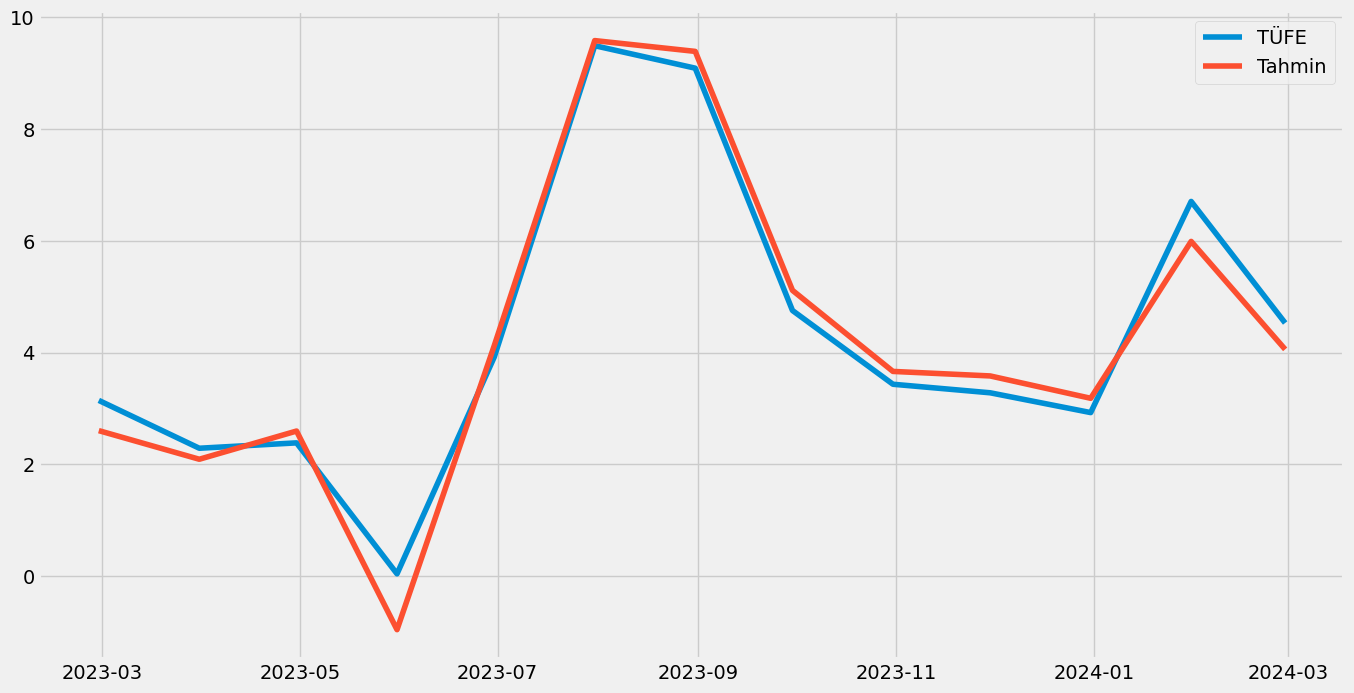

In [169]:
plt.figure(figsize=(15,8))
plt.plot(tahmin["Gerçek"].iloc[:-1],label="TÜFE")
plt.plot(tahmin[["SGDRegressor","XGBRegressor"]].mean(axis=1).iloc[:-1],label="Tahmin")
plt.legend()

In [ ]:
import optuna
import numpy as np
from sklearn.datasets import load_diabetes
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.utils import shuffle

def objective(trial):

    
    alpha = trial.suggest_loguniform("alpha", 1e-5, 1e-1)
    l1_ratio = trial.suggest_uniform("l1_ratio", 0, 1)
    max_iter = trial.suggest_int("max_iter", 100, 1000)
    loss = trial.suggest_categorical("loss", ['huber', 'epsilon_insensitive', 'squared_error', 'squared_epsilon_insensitive'])
    
    # SGDRegressor modelini oluştur
    model = SGDRegressor(
        alpha=alpha,
        l1_ratio=l1_ratio,
        max_iter=max_iter,
        loss=loss,
        random_state=0
    ).fit(X_train,y_train)
    pred=model.predict(X_test)
    rmse=np.sqrt(mean_squared_error(y_test,pred))
    return rmse

# Optuna study nesnesini oluştur
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=500)

# En iyi parametreleri ve RMSE değerini yazdır
print("En iyi parametreler: ", study.best_params)
print("En iyi RMSE değeri: ", study.best_value)


In [ ]:
import optuna
import numpy as np
from sklearn.datasets import load_diabetes
from sklearn.model_selection import cross_val_score
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.utils import shuffle

def objective(trial):

    
    # XGBRegressor için parametreleri tanımla
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 1, 500),
        "max_depth": trial.suggest_int("max_depth", 1, 20),
        "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.99),
        "subsample": trial.suggest_float("subsample", 0.1, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.1, 1.0),
        "gamma": trial.suggest_float("gamma", 0, 20),
        "reg_alpha": trial.suggest_float("reg_alpha", 0, 20),
        "reg_lambda": trial.suggest_float("reg_lambda", 0, 20),
        "random_state": 42,
        "objective": "reg:squarederror"
    }
    

    model = XGBRegressor(**params).fit(X_train,y_train)
    pred=model.predict(X_test)
    rmse=np.sqrt(mean_squared_error(y_test,pred))
    return rmse

# Optuna study nesnesini oluştur
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=500)

# En iyi parametreleri ve RMSE değerini yazdır
print("En iyi parametreler: ", study.best_params)
print("En iyi RMSE değeri: ", study.best_value)


In [275]:
y=data["TÜFE"]
X=data.drop(["M3","Zam","TÜFE","İTO","Politika Faizi","Mevduat Faizi","İthalat","Enflasyon Belirsizliği"],axis=1)
X_train,X_test=X.iloc[:-16],X.iloc[-16:-1]
y_train,y_test=y[:-16],y[-16:-1]

In [276]:
params= {'n_estimators': 288, 'max_depth': 1, 'learning_rate': 0.2505754521523871, 'subsample': 0.23484537839653188, 'colsample_bytree': 0.6936622625625481, 'gamma': 1.075490982031161, 'reg_alpha': 2.413255444510738, 'reg_lambda': 1.2444685042798094,
        "random_state": 42,"objective": "reg:squarederror"}
model = XGBRegressor(**params).fit(X_train,y_train)
pred1=model.predict(X_test)


In [277]:
model = SGDRegressor(
        alpha=0.008466677970071083,
        l1_ratio=0.8175613378274303,
        max_iter=705,
        loss='epsilon_insensitive',
        random_state=0
    ).fit(X_train,y_train)
pred2=model.predict(X_test)


In [278]:
tahminler=pd.DataFrame()
tahminler["TÜFE"]=y_test
tahminler["XGBRegressor"]=pred1
tahminler["SGDRegressor"]=pred2
tahminler["Ortalama"]=tahminler[["XGBRegressor","SGDRegressor"]].mean(axis=1)
tahminler

,TÜFE,XGBRegressor,SGDRegressor,Ortalama
2023-02-28,3.15,3.31,2.66,2.99
2023-03-31,2.29,2.06,2.43,2.25
2023-04-30,2.39,3.85,2.64,3.24
2023-05-31,2.92,3.01,1.93,2.47
2023-06-30,3.92,4.70,4.07,4.39
2023-07-31,9.49,9.06,9.10,9.08
2023-08-31,9.09,8.75,8.96,8.85
2023-09-30,4.75,4.57,6.08,5.33
2023-10-31,3.43,3.78,4.10,3.94
2023-11-30,3.28,2.76,3.66,3.21


In [282]:
features=['USD/TL', 'Motorin', 'TÜFEt-1', 'ParaArzi', 'Kredi', 'Anket', 'İhracat',
       'İşsizlik', 'ÜFEt2', 'TÜFECt2', 'ÜFEt1', 'TÜFECt1','TÜFE']
data1=data[features]
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data1.iloc[:,:-1])
scaled_data=pd.DataFrame(scaled_data,columns=data1.columns[:-1])
scaler = StandardScaler()
scaled_data["TÜFE"]=scaler.fit_transform(np.array(data1["TÜFE"]).reshape(-1, 1))
scaled_data=scaled_data.iloc[1:,:]
scaled_data

,USD/TL,Motorin,TÜFEt-1,ParaArzi,Kredi,Anket,İhracat,İşsizlik,ÜFEt2,TÜFECt2,ÜFEt1,TÜFECt1,TÜFE
1,0.22,-0.05,0.06,-0.18,0.21,-0.61,-0.57,-1.06,-0.37,-0.86,0.37,-0.67,-0.63
2,0.05,-0.58,-0.62,-0.66,-0.51,-0.64,0.30,-1.06,0.37,-0.66,-0.28,-0.49,-0.32
3,-1.09,-1.12,-0.31,-0.54,-1.21,-0.56,0.89,-0.92,-0.27,-0.48,-0.50,-0.26,-0.22
4,-1.24,-0.35,-0.22,-0.96,-0.98,-0.65,-0.71,-0.92,-0.49,-0.25,-0.72,0.17,-0.64
5,-1.16,0.10,-0.64,-1.10,-0.55,-0.96,0.05,-0.92,-0.71,0.18,-0.92,-0.11,-0.68
...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,0.09,0.85,0.48,0.74,0.42,2.90,-0.09,-1.39,0.20,0.11,-0.36,0.26,2.15
121,0.04,0.78,2.15,-0.47,0.47,1.71,-1.10,-1.59,-0.35,0.27,0.64,2.72,1.18
122,0.28,-0.63,1.19,-0.30,0.75,1.43,0.35,-1.59,0.65,2.74,0.51,0.85,0.58
123,0.05,-0.14,0.59,0.04,0.68,1.30,0.46,-1.59,0.51,0.86,0.36,0.83,-0.82


In [326]:
from sklearn.model_selection import train_test_split
X=scaled_data
X=X.iloc[:,:-1]
y=scaled_data["TÜFE"]
X=np.array(X)
y=np.array(y).reshape(-1,1)
X=pd.DataFrame(X,columns=scaled_data.columns[:-1])
y=pd.DataFrame(y,columns=["TÜFE"])
X_train,X_test=X.iloc[:-14,:],X.iloc[-14:-1,:]
y_train,y_test=y[:-14],y[-14:-1]
X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.05,random_state=42)

In [318]:
import optuna
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense,GRU,SimpleRNN
import keras
from keras.callbacks import EarlyStopping
from keras import regularizers
from keras.layers import LSTM, Dense, Dropout
from keras.regularizers import l2
def objective(trial):
    # Define hyperparameters to be optimized
    learning_rate = trial.suggest_float('learning_rate', 1e-4, 1e-1)
    units1 = trial.suggest_int('units1', 1, 128)
    batch_size = trial.suggest_int('batch_size', 2, 64)
    activation1 = trial.suggest_categorical('activation1', ['tanh','selu'])
    optimizer = trial.suggest_categorical('optimizer', ['adam'])
    rlrate=trial.suggest_float('rlrate',0.001,0.999)
    keras.utils.set_random_seed(42)
    early_stopping = EarlyStopping(monitor='val_loss', patience=1, restore_best_weights=True)
    model = Sequential()   
    model.add(Dense(units=units1,activation=activation1,input_dim=(X_train.shape[1]),kernel_regularizer=l2(rlrate)))
    model.add(Dense(units=1))

    if optimizer == 'adam':
       optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    elif optimizer == 'rmsprop':
       optimizer = tf.keras.optimizers.RMSprop(learning_rate=learning_rate)
    elif optimizer == 'SGD':
       optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)  

    

    

    model.compile(optimizer=optimizer, loss='mse', metrics=['mean_squared_error'])

    # Train model
    model.fit(X_train, y_train, epochs=1000, batch_size=batch_size,callbacks=[early_stopping],verbose=0,validation_data=(X_val,y_val))

    # Evaluate model
    y_pred = model.predict(X_test)
    mse = mean_squared_error(scaler.inverse_transform(y_test), scaler.inverse_transform(y_pred))

    return mse  # Return validation accuracy as the objective

In [ ]:
study = optuna.create_study(direction='minimize')  # or 'minimize' depending on your objective
study.optimize(objective, n_trials=2000)  # You can adjust the number of trials

# Print the best hyperparameters
print('Best hyperparameters:', study.best_params)

In [330]:
study.best_params

{'learning_rate': 0.0016211272338964935,
 'units1': 67,
 'batch_size': 20,
 'activation1': 'selu',
 'optimizer': 'adam',
 'rlrate': 0.514128702843036}

In [327]:
keras.utils.set_random_seed(42)
early_stopping = EarlyStopping(monitor='val_loss', patience=0, restore_best_weights=True)
model = Sequential()   
model.add(Dense(units=67,activation='selu',input_dim=(X_train.shape[1]),kernel_regularizer=l2(0.514128702843036)))
model.add(Dense(units=1))
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0016211272338964935)
model.compile(optimizer=optimizer, loss='mse', metrics=['mean_squared_error'])
history=model.fit(X_train, y_train, epochs=1000, batch_size=20,callbacks=[early_stopping],verbose=1,validation_data=(X_val,y_val))
y_pred = model.predict(X_test)

Epoch 1/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - loss: 11.2753 - mean_squared_error: 1.3128 - val_loss: 9.9815 - val_mean_squared_error: 0.4583
Epoch 2/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 9.8297 - mean_squared_error: 0.4804 - val_loss: 9.1591 - val_mean_squared_error: 0.3107
Epoch 3/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 9.0016 - mean_squared_error: 0.3295 - val_loss: 8.4127 - val_mean_squared_error: 0.2882
Epoch 4/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 8.2690 - mean_squared_error: 0.3213 - val_loss: 7.6417 - val_mean_squared_error: 0.2372
Epoch 5/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 7.5166 - mean_squared_error: 0.2832 - val_loss: 6.9053 - val_mean_squared_error: 0.1855
Epoch 6/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 6.8046 - mean_squared_error: 0.2462 - val_loss: 6.2404 - val_mean_squared_error: 0.1572
Epoch 7/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 6.1627 - mean_squared_error: 0.2294 - val_loss: 5.6379 - val_me

In [328]:
tahminler=pd.DataFrame(scaler.inverse_transform(y_test))
tahminler.columns=["TÜFE"]
tahminler["Tahmin"]=scaler.inverse_transform(y_pred)
tahminler=tahminler.set_index(data.index[-14:-1])
tahminler

,TÜFE,Tahmin
2023-04-30,2.39,2.43
2023-05-31,2.92,1.98
2023-06-30,3.92,3.98
2023-07-31,9.49,9.54
2023-08-31,9.09,8.88
2023-09-30,4.75,5.77
2023-10-31,3.43,3.64
2023-11-30,3.28,3.43
2023-12-31,2.93,2.78
2024-01-31,6.70,5.55


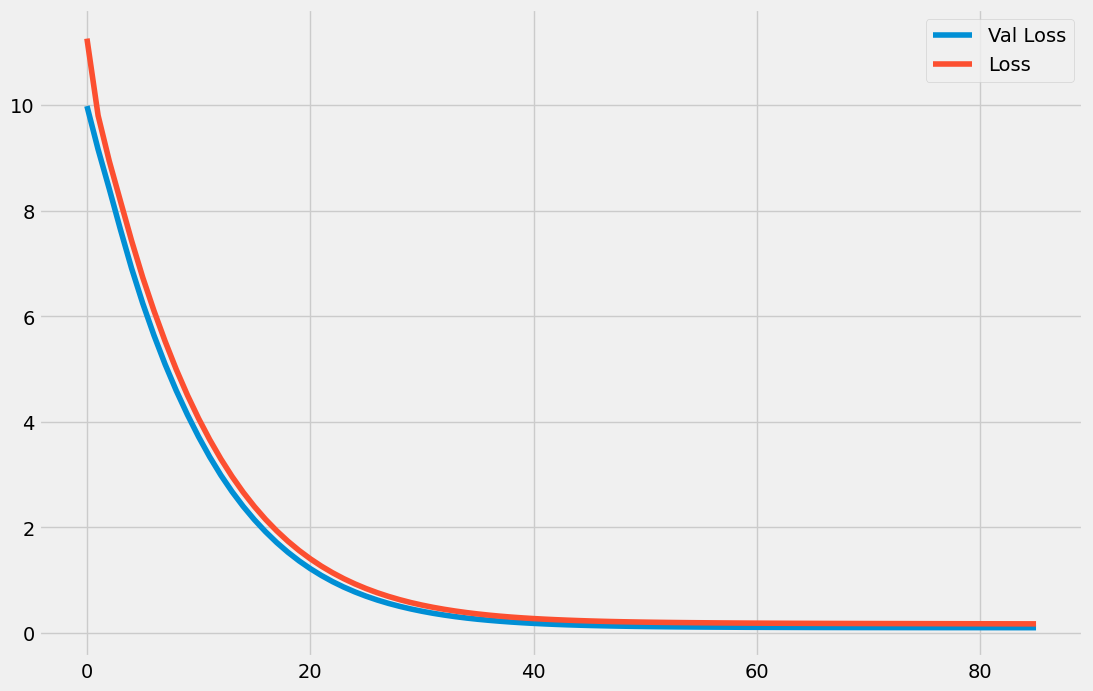

In [329]:
plt.figure(figsize=(12,8))
plt.plot(history.history["val_loss"],label="Val Loss")
plt.plot(history.history["loss"],label="Loss")
plt.legend()

In [17]:
model=auto_arima(pfaiz["Faiz"],seasonal=False,information_criterion="bic")
model_fit = model.fit(pfaiz["Faiz"])
faiztahmin = model_fit.predict(25)
faiztahmin=pd.DataFrame(faiztahmin)
faiztahmin.columns=["Faiz"]
row=pd.DataFrame({"Faiz":pfaiz.iloc[-4:,0]},index=pd.date_range(start="2024-01-30",periods=4,freq="1M"))
faiztahmin=pd.concat([row,faiztahmin],axis=0)

faiztahmin.iloc[4:,0]=[53,53,53,53,53,53,53,53,53,53,50,45,40,35,35,35,35,30,30,30,30,30,25,25,25]

## Orta Vadeli Tahminler

In [18]:
model=auto_arima(mfaiz["Mevduat Faizi"].loc[pfaiz.index[0]:],X=pfaiz,trace=False,seasonal=False,information_criterion="aic")
mfaiztahmin=pd.DataFrame(model.predict(25,X=faiztahmin[4:]))
mfaiztahmin.columns=["Mevduat Faizi"]
row=pd.DataFrame({"Mevduat Faizi":mfaiz.iloc[-2:,0]},index=pd.date_range(start="2024-03-28",periods=2,freq="1M"))
mfaiztahmin=pd.concat([row,mfaiztahmin],axis=0)
mfaiztahmin


,Mevduat Faizi
2024-03-31,57.272000
2024-04-30,67.403333
2024-05-31,67.902794
2024-06-30,65.835518
2024-07-31,67.323019
2024-08-31,67.950158
2024-09-30,67.118133
2024-10-31,67.878821
2024-11-30,67.998589
2024-12-31,68.102688


In [19]:
trainexog=pd.DataFrame()
trainexog["Dolar"]=usd.iloc[-16:-6,0].rolling(2).mean().dropna()*df14.iloc[:-6,0]
trainexog=trainexog.dropna()
trainexog=np.array(trainexog).reshape(-1,1)
testexog=pd.DataFrame()
testexog["Dolar"]=usd.iloc[-7:,0].rolling(2).mean().dropna()*df14.iloc[-6:,0]
testexog=testexog.dropna()
testexog=np.array(testexog).reshape(-1,1)

In [20]:
exog=pd.DataFrame()
exog["X"]=usd["USD/TL"].rolling(2).mean().dropna()*df14["Brent"]
exog=exog.dropna()
exog
#exog=np.array(exog).reshape(-1,1)


,X
2007-07-31,99.454046
2007-08-31,92.519699
2007-09-30,99.580871
2007-10-31,101.824103
2007-11-30,110.143119
...,...
2023-12-31,2231.258978
2024-01-31,2341.408383
2024-02-29,2481.908203
2024-03-31,2656.218779


In [21]:

zamtahmin=pd.DataFrame()
zamtahmin["Zam"]=[0,0,0,0,0,49.11,0,0,0,0,0,0,0,0,0,0,0,30,0,0,0,0,0,0,0,0,0,0,0,25]
zamtahmin.columns=["Zam"]
zamtahmin=zamtahmin.set_index(pd.date_range(start="2023-08-30",end="2026-02-27",freq="1M"))
zamtahmin

,Zam
2023-08-31,0.00
2023-09-30,0.00
2023-10-31,0.00
2023-11-30,0.00
2023-12-31,0.00
2024-01-31,49.11
2024-02-29,0.00
2024-03-31,0.00
2024-04-30,0.00
2024-05-31,0.00


In [22]:
faiztahmin.columns=["Faiz"]


In [23]:
exogtrain=pd.DataFrame()
exogtrain["Faiz"]=pfaiz["Faiz"].iloc[95:-14]
exogtrain=np.array(exogtrain).reshape(-1,1)

exogtest=pd.DataFrame()
exogtest=pd.concat([pfaiz["Faiz"].iloc[-14:-2],faiztahmin.iloc[2:,0]],axis=0)
exogtest=np.array(exogtest).reshape(-1,1)



In [24]:
exog=pfaiz["Faiz"].iloc[36:-2]
exog=np.array(exog).reshape(-1,1)

In [25]:
exogtest=faiztahmin.iloc[2:]
exogtest=np.array(exogtest).reshape(-1,1)

In [26]:
model=auto_arima(issizlik,seasonal=True,m=3,X=exog)
model_fit = model.fit(issizlik,X=exog)
issizliktahmin = model_fit.predict(27,X=exogtest)
issizliktahmin=pd.DataFrame(issizliktahmin)
issizliktahmin.columns=["İşsizlik"]
issizliktahmin

,İşsizlik
2024-03-31,8.642216
2024-04-30,8.642445
2024-05-31,8.559638
2024-06-30,8.552559
2024-07-31,8.564210
2024-08-31,8.550570
2024-09-30,8.548971
2024-10-31,8.551603
2024-11-30,8.548522
2024-12-31,8.548160


In [332]:
from prophet import Prophet

Importing plotly failed. Interactive plots will not work.


In [28]:
import optuna


In [29]:
"""import optuna
def objective(trial):
    params = {
        
        'changepoint_prior_scale': trial.suggest_float('changepoint_prior_scale', 0.005, 10),
                'changepoint_range': trial.suggest_float('changepoint_range', 0.01,0.99),
                'growth': trial.suggest_categorical('growth', ['linear']),
                'seasonality_prior_scale':trial.suggest_float('seasonality_prior_scale',0.01,10),
                'n_changepoints':trial.suggest_int('n_changepoints',1,100),
                'yearly_seasonality':trial.suggest_categorical('yearly_seasonality',[True,False,"auto"]),
                'weekly_seasonality':trial.suggest_categorical('weekly_seasonality',[True,False,"auto"])

                
    }
    
    sn=pd.DataFrame()
    sn["ds"]=df6.index
    sn["y"]=df6.values
    prophet=Prophet(changepoint_prior_scale=params["changepoint_prior_scale"],changepoint_range=params["changepoint_range"],growth=params["growth"],seasonality_prior_scale=params["seasonality_prior_scale"],n_changepoints=params["n_changepoints"],yearly_seasonality=params["yearly_seasonality"],weekly_seasonality=params["weekly_seasonality"])
    prophet.fit(sn)
    future_dates=prophet.make_future_dataframe(periods=13,freq="M")
    predictions=prophet.predict(future_dates)
    predictions=predictions.set_index(predictions["ds"])
    
    mae_score = mean_squared_error(df6.values,predictions["yhat"][:-13])
    return mae_score
try:
    study = optuna.create_study(direction='minimize')
    study.optimize(objective, n_trials=1000)
    print("Optimize işlemi başarıyla tamamlandı.")
except Exception as e:
    print(f'Hata oluştu: {e}')
    print('Optimize işlemi başarısız oldu. Devam ediyor...')
"""

'import optuna\ndef objective(trial):\n    params = {\n        \n        \'changepoint_prior_scale\': trial.suggest_float(\'changepoint_prior_scale\', 0.005, 10),\n                \'changepoint_range\': trial.suggest_float(\'changepoint_range\', 0.01,0.99),\n                \'growth\': trial.suggest_categorical(\'growth\', [\'linear\']),\n                \'seasonality_prior_scale\':trial.suggest_float(\'seasonality_prior_scale\',0.01,10),\n                \'n_changepoints\':trial.suggest_int(\'n_changepoints\',1,100),\n                \'yearly_seasonality\':trial.suggest_categorical(\'yearly_seasonality\',[True,False,"auto"]),\n                \'weekly_seasonality\':trial.suggest_categorical(\'weekly_seasonality\',[True,False,"auto"])\n\n                \n    }\n    \n    sn=pd.DataFrame()\n    sn["ds"]=df6.index\n    sn["y"]=df6.values\n    prophet=Prophet(changepoint_prior_scale=params["changepoint_prior_scale"],changepoint_range=params["changepoint_range"],growth=params["growth"],se

In [30]:
"""study.best_params"""

'study.best_params'

In [31]:
sn=pd.DataFrame()
sn["ds"]=usd.index
sn["y"]=usd.values
prophet=Prophet(growth="linear",changepoint_prior_scale=7.349638369822835,changepoint_range=0.9894193005763949,seasonality_prior_scale=9.159423931839974,n_changepoints=89,interval_width=0.70,yearly_seasonality=False,weekly_seasonality=False)
prophet.fit(sn)
future_dates=prophet.make_future_dataframe(periods=26,freq="M")
predictions=prophet.predict(future_dates)
predictions=predictions.set_index(predictions["ds"])

00:01:23 - cmdstanpy - INFO - Chain [1] start processing
00:01:24 - cmdstanpy - INFO - Chain [1] done processing


In [32]:
usdtahmin=(predictions["yhat"][-27:].pct_change(periods=1)*100).dropna()
usdtahmin

ds
2024-05-31    2.789886
2024-06-30    2.626610
2024-07-31    2.644698
2024-08-31    2.576556
2024-09-30    2.430810
2024-10-31    2.452228
2024-11-30    2.316322
2024-12-31    2.339346
2025-01-31    2.285872
2025-02-28    2.018518
2025-03-31    2.190570
2025-04-30    2.074464
2025-05-31    2.100048
2025-06-30    1.990503
2025-07-31    2.016711
2025-08-31    1.976843
2025-09-30    1.875989
2025-10-31    1.902825
2025-11-30    1.807059
2025-12-31    1.834150
2026-01-31    1.801115
2026-02-28    1.598031
2026-03-31    1.741420
2026-04-30    1.656400
2026-05-31    1.683724
2026-06-30    1.602430
Name: yhat, dtype: float64

In [33]:
usdtahmin1 = []
result = usd.iloc[-1,0]
for i in range(len(usdtahmin)):
    result *= (1 + usdtahmin[i] / 100)
    usdtahmin1.append(result)

usdtahmin1 = np.array(usdtahmin1).reshape(-1, 1)
usdtahmin1 = pd.DataFrame(usdtahmin1)
usdtahmin1.columns = ["USD/TL"]
usdtahmin1=pd.concat([usd.iloc[-6:],usdtahmin1],axis=0)
usdtahmin1 = usdtahmin1.set_index(pd.date_range(start="2023-11-30", periods=len(usdtahmin1), freq="1M"))
usdtahmin1

,USD/TL
2023-11-30,28.637082
2023-12-31,29.074857
2024-01-31,30.053750
2024-02-29,30.759448
2024-03-31,31.986743
2024-04-30,32.325488
2024-05-31,33.227333
2024-06-30,34.100085
2024-07-31,35.001929
2024-08-31,35.903774


In [34]:
"""import optuna
def objective(trial):
    params = {
        
        'changepoint_prior_scale': trial.suggest_float('changepoint_prior_scale', 0.001, 10),
                'changepoint_range': trial.suggest_float('changepoint_range', 0.01,0.99),
                'seasonality_prior_scale':trial.suggest_float('seasonality_prior_scale',0.001,10),
                'n_changepoints':trial.suggest_int('n_changepoints',1,100),
                'growth':trial.suggest_categorical('growth',['linear'])
                
    }
    
    sn=pd.DataFrame()
    sn["ds"]=df14[50:].index
    sn["y"]=df14[50:].values
    prophet=Prophet(**params)
    prophet.fit(sn)
    future_dates=prophet.make_future_dataframe(periods=13,freq="M")
    predictions=prophet.predict(future_dates)
    predictions=predictions.set_index(predictions["ds"])
    
    mae_score = mean_squared_error(sn["y"],predictions["yhat"][:-13])
    return mae_score
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=1000)"""

'import optuna\ndef objective(trial):\n    params = {\n        \n        \'changepoint_prior_scale\': trial.suggest_float(\'changepoint_prior_scale\', 0.001, 10),\n                \'changepoint_range\': trial.suggest_float(\'changepoint_range\', 0.01,0.99),\n                \'seasonality_prior_scale\':trial.suggest_float(\'seasonality_prior_scale\',0.001,10),\n                \'n_changepoints\':trial.suggest_int(\'n_changepoints\',1,100),\n                \'growth\':trial.suggest_categorical(\'growth\',[\'linear\'])\n                \n    }\n    \n    sn=pd.DataFrame()\n    sn["ds"]=df14[50:].index\n    sn["y"]=df14[50:].values\n    prophet=Prophet(**params)\n    prophet.fit(sn)\n    future_dates=prophet.make_future_dataframe(periods=13,freq="M")\n    predictions=prophet.predict(future_dates)\n    predictions=predictions.set_index(predictions["ds"])\n    \n    mae_score = mean_squared_error(sn["y"],predictions["yhat"][:-13])\n    return mae_score\nstudy = optuna.create_study(direction=

In [35]:
"""study.best_params"""

'study.best_params'

In [36]:
sn=pd.DataFrame()
sn["ds"]=df14.index
sn["y"]=df14.values
prophet=Prophet(growth="linear",changepoint_prior_scale=9.333547662504625,changepoint_range=0.9362159367416,seasonality_prior_scale=2.378940289163559,n_changepoints=98)
prophet.fit(sn)
future_dates=prophet.make_future_dataframe(periods=25,freq="M")
predictions=prophet.predict(future_dates)
predictions=predictions.set_index(predictions["ds"])

00:01:24 - cmdstanpy - INFO - Chain [1] start processing
00:01:25 - cmdstanpy - INFO - Chain [1] done processing


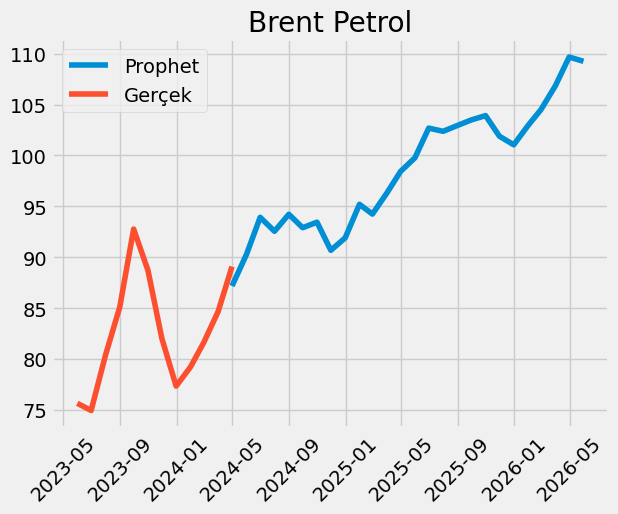

In [37]:
plt.title("Brent Petrol")
plt.plot(predictions["yhat"][-26:],label="Prophet")
plt.plot(df14["Brent"][-12:],label="Gerçek")
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [38]:
brenttahmin=predictions["yhat"][-29:]
brenttahmin

ds
2024-01-31     79.125110
2024-02-29     84.005597
2024-03-31     85.767043
2024-04-30     87.167631
2024-05-31     90.237122
2024-06-30     93.919924
2024-07-31     92.546056
2024-08-31     94.219997
2024-09-30     92.899041
2024-10-31     93.441744
2024-11-30     90.679031
2024-12-31     91.896515
2025-01-31     95.198554
2025-02-28     94.236782
2025-03-31     96.290934
2025-04-30     98.434890
2025-05-31     99.770354
2025-06-30    102.693473
2025-07-31    102.375759
2025-08-31    102.950752
2025-09-30    103.493317
2025-10-31    103.920793
2025-11-30    101.894847
2025-12-31    101.049568
2026-01-31    102.947806
2026-02-28    104.515193
2026-03-31    106.838999
2026-04-30    109.680320
2026-05-31    109.260842
Name: yhat, dtype: float64

In [39]:
"""import optuna
def objective(trial):
    params = {
        
        'changepoint_prior_scale': trial.suggest_float('changepoint_prior_scale', 0.001, 10),
                'changepoint_range': trial.suggest_float('changepoint_range', 0.01,0.99),
                'seasonality_prior_scale':trial.suggest_float('seasonality_prior_scale',0.001,10),
                'n_changepoints':trial.suggest_int('n_changepoints',1,50),
                'growth':trial.suggest_categorical('growth',['linear'])

            

                
    }
    
    sn=pd.DataFrame()
    sn["ds"]=enf_belirsizlik.index
    sn["y"]=enf_belirsizlik.values
    sn["USD"]=(df6.pct_change()*100)[88:-1].dropna().values
    prophet=Prophet(**params)
    prophet.add_regressor('USD')
    prophet.fit(sn)
    future_dates=prophet.make_future_dataframe(periods=13,freq="M")
    future_dates["USD"]=pd.concat([sn["USD"],usdtahmin.head(13)],axis=0).values
    predictions=prophet.predict(future_dates)
    predictions=predictions.set_index(predictions["ds"])
    
    mae_score = mean_squared_error(sn["y"],predictions["yhat"][:-13])
    return mae_score
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=1000)"""

'import optuna\ndef objective(trial):\n    params = {\n        \n        \'changepoint_prior_scale\': trial.suggest_float(\'changepoint_prior_scale\', 0.001, 10),\n                \'changepoint_range\': trial.suggest_float(\'changepoint_range\', 0.01,0.99),\n                \'seasonality_prior_scale\':trial.suggest_float(\'seasonality_prior_scale\',0.001,10),\n                \'n_changepoints\':trial.suggest_int(\'n_changepoints\',1,50),\n                \'growth\':trial.suggest_categorical(\'growth\',[\'linear\'])\n\n            \n\n                \n    }\n    \n    sn=pd.DataFrame()\n    sn["ds"]=enf_belirsizlik.index\n    sn["y"]=enf_belirsizlik.values\n    sn["USD"]=(df6.pct_change()*100)[88:-1].dropna().values\n    prophet=Prophet(**params)\n    prophet.add_regressor(\'USD\')\n    prophet.fit(sn)\n    future_dates=prophet.make_future_dataframe(periods=13,freq="M")\n    future_dates["USD"]=pd.concat([sn["USD"],usdtahmin.head(13)],axis=0).values\n    predictions=prophet.predict(fut

In [40]:
"""study.best_params"""

'study.best_params'

00:23:14 - cmdstanpy - INFO - Chain [1] start processing
00:23:14 - cmdstanpy - INFO - Chain [1] done processing


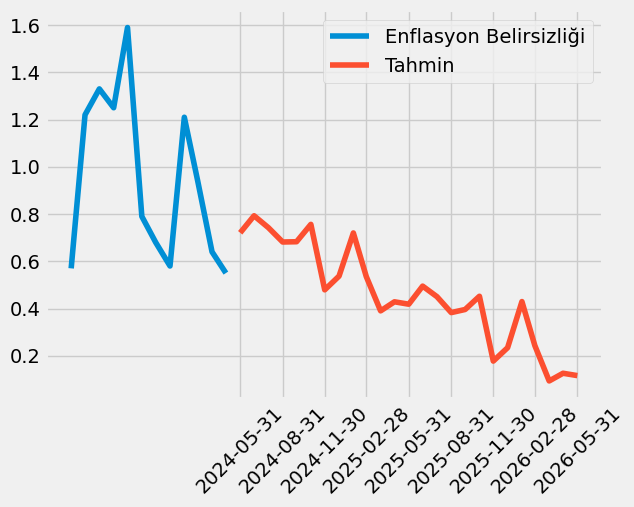

In [342]:
sn=pd.DataFrame()
sn["ds"]=enf_belirsizlik.index
sn["y"]=enf_belirsizlik.values
prophet=Prophet(changepoint_prior_scale=1.2891424441378785,changepoint_range=0.9594901336677199,seasonality_prior_scale=0.1053403857042852,n_changepoints=44,growth="linear")
prophet.fit(sn)
future_dates=prophet.make_future_dataframe(periods=25,freq="M")
predictions=prophet.predict(future_dates)
predictions=predictions.set_index(predictions["ds"])
plt.plot(enf_belirsizlik[-12:],label="Enflasyon Belirsizliği")
plt.plot(predictions["yhat"][-25:],label="Tahmin")
plt.xticks(predictions.index[-25::3],rotation=45)
plt.legend()


In [42]:
enfbelirsizliktahmin1=pd.DataFrame(predictions["yhat"][-26:])
enfbelirsizliktahmin1.columns=["Enflasyon Belirsizliği"]
enfbelirsizliktahmin1.index.names=[""]
enfbelirsizliktahmin1.iloc[0,0]=enf_belirsizlik.iloc[-1,0]
enfbelirsizliktahmin1

,Enflasyon Belirsizliği
,
2024-04-30,0.550000
2024-05-31,0.536470
2024-06-30,0.556543
2024-07-31,0.448372
2024-08-31,0.352072
2024-09-30,0.326350
2024-10-31,0.370330
2024-11-30,0.042653
2024-12-31,0.062325


In [43]:
'''import optuna
def objective(trial):
    params = {
        
        'changepoint_prior_scale': trial.suggest_float('changepoint_prior_scale', 0.005, 5),
                'changepoint_range': trial.suggest_float('changepoint_range', 0.1,0.9),
                'growth': trial.suggest_categorical('growth', ['linear', 'logistic']),
                'seasonality_prior_scale':trial.suggest_float('seasonality_prior_scale',[0.01,10]),
                'n_changepoints':trial.suggest_int('n_changepoints',1,25),
                'yearly_seasonality':trial.suggest_categorical('yearly_seasonality',[True,False,"auto"]),
                'weekly_seasonality':trial.suggest_categorical('weekly_seasonality',[True,False,"auto"]),
                'm':trial.suggest_int('m',0,110),
                'cap':trial.suggest_float('cap',0,200)

                
    }
    
    sn=pd.DataFrame()
    sn["ds"]=perakende1["Mevsimsellikten ve Takvimden Arındırılmış"][params["m"]:-12].index
    sn["y"]=perakende1["Mevsimsellikten ve Takvimden Arındırılmış"][params["m"]:-12].values
    sn["cap"]=params["cap"]
    prophet=Prophet(changepoint_prior_scale=params["changepoint_prior_scale"],changepoint_range=params["changepoint_range"],growth=params["growth"],seasonality_prior_scale=params["seasonality_prior_scale"],n_changepoints=params["n_changepoints"],yearly_seasonality=params["yearly_seasonality"],weekly_seasonality=params["weekly_seasonality"],)
    prophet.fit(sn)
    future_dates=prophet.make_future_dataframe(periods=12,freq="M")
    future_dates["cap"]=params["cap"]
    predictions=prophet.predict(future_dates)
    predictions=predictions.set_index(predictions["ds"])
    
    mae_score = mean_squared_error(perakende1["Mevsimsellikten ve Takvimden Arındırılmış"][-12:],predictions["yhat"].tail(12))
    return mae_score
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=1000)'''

'import optuna\ndef objective(trial):\n    params = {\n        \n        \'changepoint_prior_scale\': trial.suggest_float(\'changepoint_prior_scale\', 0.005, 5),\n                \'changepoint_range\': trial.suggest_float(\'changepoint_range\', 0.1,0.9),\n                \'growth\': trial.suggest_categorical(\'growth\', [\'linear\', \'logistic\']),\n                \'seasonality_prior_scale\':trial.suggest_float(\'seasonality_prior_scale\',[0.01,10]),\n                \'n_changepoints\':trial.suggest_int(\'n_changepoints\',1,25),\n                \'yearly_seasonality\':trial.suggest_categorical(\'yearly_seasonality\',[True,False,"auto"]),\n                \'weekly_seasonality\':trial.suggest_categorical(\'weekly_seasonality\',[True,False,"auto"]),\n                \'m\':trial.suggest_int(\'m\',0,110),\n                \'cap\':trial.suggest_float(\'cap\',0,200)\n\n                \n    }\n    \n    sn=pd.DataFrame()\n    sn["ds"]=perakende1["Mevsimsellikten ve Takvimden Arındırılmış"][p

In [44]:
#study.best_params

In [45]:
((usdtahmin1[2:-2].pct_change(periods=1)*100).dropna())

,USD/TL
2024-02-29,2.348118
2024-03-31,3.989978
2024-04-30,1.059018
2024-05-31,2.789886
2024-06-30,2.626610
2024-07-31,2.644698
2024-08-31,2.576556
2024-09-30,2.430810
2024-10-31,2.452228
2024-11-30,2.316322


In [46]:
brenttahmin1=(brenttahmin.pct_change()*100).dropna()
brenttahmin1

ds
2024-02-29    6.168063
2024-03-31    2.096820
2024-04-30    1.633014
2024-05-31    3.521366
2024-06-30    4.081250
2024-07-31   -1.462809
2024-08-31    1.808765
2024-09-30   -1.401991
2024-10-31    0.584186
2024-11-30   -2.956615
2024-12-31    1.342630
2025-01-31    3.593215
2025-02-28   -1.010280
2025-03-31    2.179778
2025-04-30    2.226539
2025-05-31    1.356698
2025-06-30    2.929847
2025-07-31   -0.309381
2025-08-31    0.561650
2025-09-30    0.527014
2025-10-31    0.413048
2025-11-30   -1.949510
2025-12-31   -0.829560
2026-01-31    1.878521
2026-02-28    1.522507
2026-03-31    2.223415
2026-04-30    2.659442
2026-05-31   -0.382455
Name: yhat, dtype: float64

In [47]:
motorintahmin=pd.DataFrame((1+(((usdtahmin1[2:-2].pct_change(periods=1)*100).dropna())/100)).values*(1+(((brenttahmin1[:-1]).dropna())/100)).values.reshape(-1,1))
motorintahmin.columns=["Motorin"]
motorintahmin=motorintahmin.set_index(pd.date_range(start="2024-02-28",periods=len(motorintahmin),freq="1M"))
motorintahmin.iloc[0,0]=(motorin.pct_change(periods=1)*100).iloc[-1,0]
motorintahmin[1:]=((motorintahmin[1:])-1)*100
motorintahmin

,Motorin
2024-02-29,-2.609922
2024-03-31,6.170461
2024-04-30,2.709325
2024-05-31,6.409494
2024-06-30,6.815059
2024-07-31,1.143203
2024-08-31,4.431925
2024-09-30,0.994739
2024-10-31,3.050740
2024-11-30,-0.708778


In [48]:
"""import optuna
def objective(trial):
    params = {
        
        'changepoint_prior_scale': trial.suggest_float('changepoint_prior_scale', 0.005, 5),
                'changepoint_range': trial.suggest_float('changepoint_range', 0.01,0.99),
                'growth': trial.suggest_categorical('growth', ['linear']),
                'seasonality_prior_scale':trial.suggest_float('seasonality_prior_scale',0.01,10),
                'n_changepoints':trial.suggest_int('n_changepoints',1,100),
                'yearly_seasonality':trial.suggest_categorical('yearly_seasonality',[True,False,"auto"]),
                'weekly_seasonality':trial.suggest_categorical('weekly_seasonality',[True,False,"auto"]),

                
    }
    
    sn=pd.DataFrame()
    sn["ds"]=money["Para Arzi"].index
    sn["y"]=money["Para Arzi"].values
    prophet=Prophet(changepoint_prior_scale=params["changepoint_prior_scale"],changepoint_range=params["changepoint_range"],growth=params["growth"],seasonality_prior_scale=params["seasonality_prior_scale"],n_changepoints=params["n_changepoints"],yearly_seasonality=params["yearly_seasonality"],weekly_seasonality=params["weekly_seasonality"],)
    prophet.fit(sn)
    future_dates=prophet.make_future_dataframe(periods=13,freq="M")
    predictions=prophet.predict(future_dates)
    predictions=predictions.set_index(predictions["ds"])
    
    mae_score = mean_squared_error(money["Para Arzi"],predictions["yhat"][:-13])
    return mae_score
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=1000)"""

'import optuna\ndef objective(trial):\n    params = {\n        \n        \'changepoint_prior_scale\': trial.suggest_float(\'changepoint_prior_scale\', 0.005, 5),\n                \'changepoint_range\': trial.suggest_float(\'changepoint_range\', 0.01,0.99),\n                \'growth\': trial.suggest_categorical(\'growth\', [\'linear\']),\n                \'seasonality_prior_scale\':trial.suggest_float(\'seasonality_prior_scale\',0.01,10),\n                \'n_changepoints\':trial.suggest_int(\'n_changepoints\',1,100),\n                \'yearly_seasonality\':trial.suggest_categorical(\'yearly_seasonality\',[True,False,"auto"]),\n                \'weekly_seasonality\':trial.suggest_categorical(\'weekly_seasonality\',[True,False,"auto"]),\n\n                \n    }\n    \n    sn=pd.DataFrame()\n    sn["ds"]=money["Para Arzi"].index\n    sn["y"]=money["Para Arzi"].values\n    prophet=Prophet(changepoint_prior_scale=params["changepoint_prior_scale"],changepoint_range=params["changepoint_rang

In [49]:
"""study.best_params"""

'study.best_params'

In [50]:
sn=pd.DataFrame()
sn["ds"]=money["Para Arzi"].index
sn["y"]=money["Para Arzi"].values
prophet=Prophet(changepoint_prior_scale=1.916034897796889,changepoint_range=0.9729543315216538,growth='linear',seasonality_prior_scale=4.453031163229546,n_changepoints=89,yearly_seasonality="auto",weekly_seasonality=True)
prophet.fit(sn)
future_dates=prophet.make_future_dataframe(periods=25,freq="M")
predictions=prophet.predict(future_dates)
predictions=predictions.set_index(predictions["ds"])

00:01:27 - cmdstanpy - INFO - Chain [1] start processing
00:01:27 - cmdstanpy - INFO - Chain [1] done processing


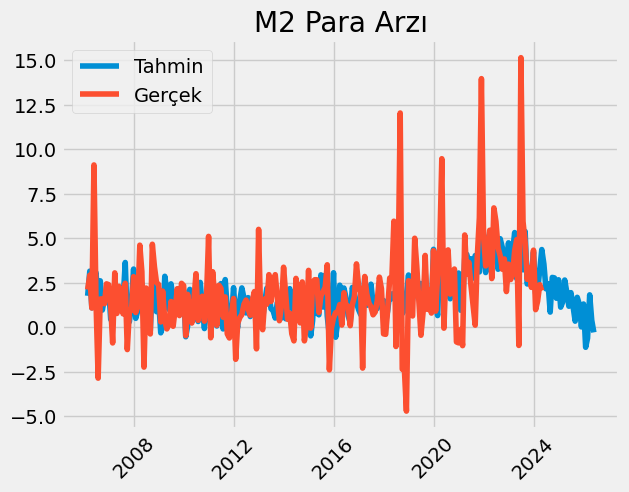

In [51]:
plt.title("M2 Para Arzı")
plt.plot(predictions["yhat"],label="Tahmin")
plt.plot(money["Para Arzi"],label="Gerçek")
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [52]:
paraarzitahmin=(predictions["yhat"]).tail(25)
paraarzitahmin

ds
2024-05-31    3.550116
2024-06-30    2.165406
2024-07-31    2.446033
2024-08-31    0.856422
2024-09-30    2.804437
2024-10-31    2.777008
2024-11-30    1.631130
2024-12-31    2.670492
2025-01-31    1.132325
2025-02-28    1.408000
2025-03-31    2.658214
2025-04-30    1.992871
2025-05-31    1.184937
2025-06-30    1.948617
2025-07-31    1.178779
2025-08-31    0.345310
2025-09-30    1.685710
2025-10-31    1.293595
2025-11-30    0.023884
2025-12-31    1.309706
2026-01-31   -1.122831
2026-02-28   -0.608851
2026-03-31    1.824412
2026-04-30    0.399740
2026-05-31   -0.283540
Name: yhat, dtype: float64

In [53]:
paraarzitahmin1 = paraarzitahmin
paraarzitahmin1 = np.array(paraarzitahmin1).reshape(-1, 1)
paraarzitahmin1 = pd.DataFrame(paraarzitahmin1)
paraarzitahmin1.columns = ["Para Arzi"]
paraarzitahmin1 = paraarzitahmin1.set_index(pd.date_range(start="2024-05-30", periods=len(paraarzitahmin), freq="1M"))
row=pd.DataFrame({"Para Arzi":money.iloc[-4:,0]},index=pd.date_range(start="2024-01-30",periods=4,freq="M"))
paraarzitahmin1=pd.concat([row,paraarzitahmin1])
paraarzitahmin1

,Para Arzi
2024-01-31,0.992308
2024-02-29,1.467195
2024-03-31,2.396667
2024-04-30,2.060590
2024-05-31,3.550116
2024-06-30,2.165406
2024-07-31,2.446033
2024-08-31,0.856422
2024-09-30,2.804437
2024-10-31,2.777008


In [54]:
'''import optuna
def objective(trial):
    params = {
        
        'changepoint_prior_scale': trial.suggest_float('changepoint_prior_scale', 0.005, 5),
                'changepoint_range': trial.suggest_float('changepoint_range', 0.1,0.9),
                'growth': trial.suggest_categorical('growth', ['linear', 'logistic']),
                'seasonality_prior_scale':trial.suggest_float('seasonality_prior_scale',0.01,10),
                'n_changepoints':trial.suggest_int('n_changepoints',1,25),
                'yearly_seasonality':trial.suggest_categorical('yearly_seasonality',[True,False,"auto"]),
                'weekly_seasonality':trial.suggest_categorical('weekly_seasonality',[True,False,"auto"]),
                'm':trial.suggest_int('m',0,110),
                'cap':trial.suggest_float('cap',0,200)

                
    }
    
    sn=pd.DataFrame()
    sn["ds"]=borc["Borç"][params["m"]:-12].index
    sn["y"]=borc["Borç"][params["m"]:-12].values
    sn["cap"]=params["cap"]
    prophet=Prophet(changepoint_prior_scale=params["changepoint_prior_scale"],changepoint_range=params["changepoint_range"],growth=params["growth"],seasonality_prior_scale=params["seasonality_prior_scale"],n_changepoints=params["n_changepoints"],yearly_seasonality=params["yearly_seasonality"],weekly_seasonality=params["weekly_seasonality"],)
    prophet.fit(sn)
    future_dates=prophet.make_future_dataframe(periods=12,freq="M")
    future_dates["cap"]=params["cap"]
    predictions=prophet.predict(future_dates)
    predictions=predictions.set_index(predictions["ds"])
    
    mae_score = mean_squared_error(borc["Borç"][-12:],predictions["yhat"][-12:])
    return mae_score
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=1000)'''

'import optuna\ndef objective(trial):\n    params = {\n        \n        \'changepoint_prior_scale\': trial.suggest_float(\'changepoint_prior_scale\', 0.005, 5),\n                \'changepoint_range\': trial.suggest_float(\'changepoint_range\', 0.1,0.9),\n                \'growth\': trial.suggest_categorical(\'growth\', [\'linear\', \'logistic\']),\n                \'seasonality_prior_scale\':trial.suggest_float(\'seasonality_prior_scale\',0.01,10),\n                \'n_changepoints\':trial.suggest_int(\'n_changepoints\',1,25),\n                \'yearly_seasonality\':trial.suggest_categorical(\'yearly_seasonality\',[True,False,"auto"]),\n                \'weekly_seasonality\':trial.suggest_categorical(\'weekly_seasonality\',[True,False,"auto"]),\n                \'m\':trial.suggest_int(\'m\',0,110),\n                \'cap\':trial.suggest_float(\'cap\',0,200)\n\n                \n    }\n    \n    sn=pd.DataFrame()\n    sn["ds"]=borc["Borç"][params["m"]:-12].index\n    sn["y"]=borc["Borç

In [55]:
#study.best_params

In [56]:
"""import optuna
def objective(trial):
    params = {
        
        'changepoint_prior_scale': trial.suggest_float('changepoint_prior_scale', 0.001, 5),
                'changepoint_range': trial.suggest_float('changepoint_range', 0.01,0.99),
                'growth': trial.suggest_categorical('growth', ['linear']),
                'seasonality_prior_scale':trial.suggest_float('seasonality_prior_scale',0.01,5),
                'n_changepoints':trial.suggest_int('n_changepoints',1,200),
                'yearly_seasonality':trial.suggest_categorical('yearly_seasonality',[True,False,"auto"]),
                'weekly_seasonality':trial.suggest_categorical('weekly_seasonality',[True,False,"auto"]),


                
    }
    
    sn=pd.DataFrame()
    sn["ds"]=df3["Kredi"].index
    sn["y"]=df3["Kredi"].values
    prophet=Prophet(changepoint_prior_scale=params["changepoint_prior_scale"],changepoint_range=params["changepoint_range"],growth=params["growth"],seasonality_prior_scale=params["seasonality_prior_scale"],n_changepoints=params["n_changepoints"],yearly_seasonality=params["yearly_seasonality"],weekly_seasonality=params["weekly_seasonality"],)
    prophet.fit(sn)
    future_dates=prophet.make_future_dataframe(periods=13,freq="M")
    predictions=prophet.predict(future_dates)
    predictions=predictions.set_index(predictions["ds"])
    
    mae_score = mean_squared_error(df3.values,predictions["yhat"][:-13])
    return mae_score
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=1000)"""

'import optuna\ndef objective(trial):\n    params = {\n        \n        \'changepoint_prior_scale\': trial.suggest_float(\'changepoint_prior_scale\', 0.001, 5),\n                \'changepoint_range\': trial.suggest_float(\'changepoint_range\', 0.01,0.99),\n                \'growth\': trial.suggest_categorical(\'growth\', [\'linear\']),\n                \'seasonality_prior_scale\':trial.suggest_float(\'seasonality_prior_scale\',0.01,5),\n                \'n_changepoints\':trial.suggest_int(\'n_changepoints\',1,200),\n                \'yearly_seasonality\':trial.suggest_categorical(\'yearly_seasonality\',[True,False,"auto"]),\n                \'weekly_seasonality\':trial.suggest_categorical(\'weekly_seasonality\',[True,False,"auto"]),\n\n\n                \n    }\n    \n    sn=pd.DataFrame()\n    sn["ds"]=df3["Kredi"].index\n    sn["y"]=df3["Kredi"].values\n    prophet=Prophet(changepoint_prior_scale=params["changepoint_prior_scale"],changepoint_range=params["changepoint_range"],growth=

In [57]:
"""study.best_params"""

'study.best_params'

In [58]:
sn=pd.DataFrame()
sn["ds"]=kredi["Kredi"].index
sn["y"]=kredi["Kredi"].values
prophet=Prophet(changepoint_prior_scale=30.99759561372614,changepoint_range=0.872589785485153,growth="linear",seasonality_prior_scale=3.534157847860739,n_changepoints=189,yearly_seasonality=True,weekly_seasonality=True)

prophet.fit(sn)
future_dates=prophet.make_future_dataframe(periods=25,freq="M")
predictions=prophet.predict(future_dates)
predictions=predictions.set_index(predictions["ds"])

00:01:28 - cmdstanpy - INFO - Chain [1] start processing
00:01:28 - cmdstanpy - INFO - Chain [1] done processing


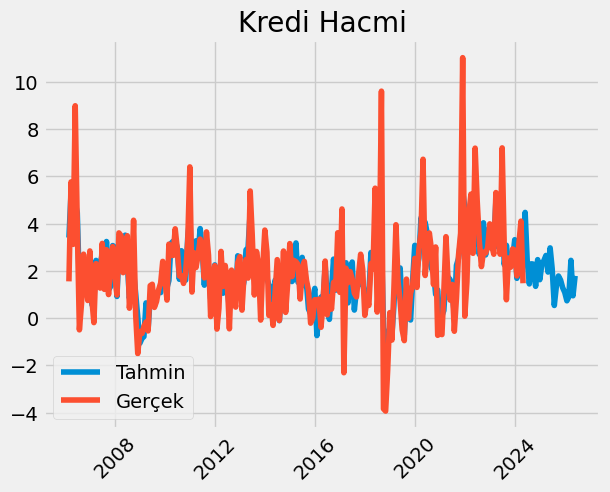

In [59]:
plt.title("Kredi Hacmi")
plt.plot(predictions["yhat"],label="Tahmin")
plt.plot(kredi["Kredi"],label="Gerçek")
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [60]:
kreditahmin=(predictions["yhat"]).tail(25)
kreditahmin

ds
2024-05-31    4.477563
2024-06-30    2.434709
2024-07-31    1.451280
2024-08-31    2.303312
2024-09-30    2.285860
2024-10-31    1.349219
2024-11-30    2.479064
2024-12-31    1.629513
2025-01-31    2.293839
2025-02-28    2.432162
2025-03-31    2.655009
2025-04-30    1.953229
2025-05-31    2.976380
2025-06-30    2.097806
2025-07-31    0.538922
2025-08-31    1.377498
2025-09-30    1.786298
2025-10-31    1.613597
2025-11-30    1.292227
2025-12-31    1.090084
2026-01-31    0.736843
2026-02-28    0.900877
2026-03-31    2.448574
2026-04-30    0.948629
2026-05-31    1.791369
Name: yhat, dtype: float64

In [61]:
kreditahmin1 = kreditahmin

kreditahmin1 = np.array(kreditahmin1).reshape(-1, 1)
kreditahmin1 = pd.DataFrame(kreditahmin1)
kreditahmin1.columns = ["Kredi"]
kreditahmin1 = kreditahmin1.set_index(pd.date_range(start="2024-05-30", periods=len(kreditahmin1), freq="1M"))
row=pd.DataFrame({"Kredi":kredi.iloc[-4:,0]},index=pd.date_range(start="2024-01-30",periods=4,freq="1M"))
kreditahmin1=pd.concat([row,kreditahmin1],axis=0)
kreditahmin1

,Kredi
2024-01-31,1.789324
2024-02-29,3.130261
2024-03-31,4.108658
2024-04-30,1.479118
2024-05-31,4.477563
2024-06-30,2.434709
2024-07-31,1.451280
2024-08-31,2.303312
2024-09-30,2.285860
2024-10-31,1.349219


In [62]:
"""import optuna
def objective(trial):
    params = {
        
        'changepoint_prior_scale': trial.suggest_float('changepoint_prior_scale', 0.005, 10),
                'changepoint_range': trial.suggest_float('changepoint_range', 0.01,0.99),
                'growth': trial.suggest_categorical('growth', ['linear']),
                'seasonality_prior_scale':trial.suggest_float('seasonality_prior_scale',0.01,10),
                'n_changepoints':trial.suggest_int('n_changepoints',1,150),
                'yearly_seasonality':trial.suggest_categorical('yearly_seasonality',[True,False,"auto"]),
                'weekly_seasonality':trial.suggest_categorical('weekly_seasonality',[True,False,"auto"]),

                
    }
    
    sn=pd.DataFrame()
    sn["ds"]=m3["M3 Para Arzi"].index
    sn["y"]=m3["M3 Para Arzi"].values
    prophet=Prophet(changepoint_prior_scale=params["changepoint_prior_scale"],changepoint_range=params["changepoint_range"],growth=params["growth"],seasonality_prior_scale=params["seasonality_prior_scale"],n_changepoints=params["n_changepoints"],yearly_seasonality=params["yearly_seasonality"],weekly_seasonality=params["weekly_seasonality"],)
    prophet.fit(sn)
    future_dates=prophet.make_future_dataframe(periods=12,freq="M")
    predictions=prophet.predict(future_dates)
    predictions=predictions.set_index(predictions["ds"])
    
    mae_score = mean_squared_error(m3["M3 Para Arzi"],predictions["yhat"][:-12])
    return mae_score
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=1000)"""

'import optuna\ndef objective(trial):\n    params = {\n        \n        \'changepoint_prior_scale\': trial.suggest_float(\'changepoint_prior_scale\', 0.005, 10),\n                \'changepoint_range\': trial.suggest_float(\'changepoint_range\', 0.01,0.99),\n                \'growth\': trial.suggest_categorical(\'growth\', [\'linear\']),\n                \'seasonality_prior_scale\':trial.suggest_float(\'seasonality_prior_scale\',0.01,10),\n                \'n_changepoints\':trial.suggest_int(\'n_changepoints\',1,150),\n                \'yearly_seasonality\':trial.suggest_categorical(\'yearly_seasonality\',[True,False,"auto"]),\n                \'weekly_seasonality\':trial.suggest_categorical(\'weekly_seasonality\',[True,False,"auto"]),\n\n                \n    }\n    \n    sn=pd.DataFrame()\n    sn["ds"]=m3["M3 Para Arzi"].index\n    sn["y"]=m3["M3 Para Arzi"].values\n    prophet=Prophet(changepoint_prior_scale=params["changepoint_prior_scale"],changepoint_range=params["changepoint_ran

In [63]:
"""study.best_params"""

'study.best_params'

In [64]:
sn=pd.DataFrame()
sn["ds"]=m3["M3"].index
sn["y"]=m3["M3"].values
prophet=Prophet(changepoint_prior_scale=6.802652830514151,changepoint_range=0.9787110716126334,growth='linear',seasonality_prior_scale=5.79604715670266,n_changepoints=98,yearly_seasonality="auto",weekly_seasonality=False)
prophet.fit(sn)
future_dates=prophet.make_future_dataframe(periods=13,freq="M")
predictions=prophet.predict(future_dates)
predictions=predictions.set_index(predictions["ds"])

00:01:29 - cmdstanpy - INFO - Chain [1] start processing
00:01:29 - cmdstanpy - INFO - Chain [1] done processing


In [65]:
(predictions["yhat"].tail(13))

ds
2024-05-31    1.906709
2024-06-30    1.279776
2024-07-31    1.013886
2024-08-31   -0.245457
2024-09-30    0.757780
2024-10-31    0.711302
2024-11-30    0.058296
2024-12-31   -0.928863
2025-01-31   -2.200107
2025-02-28   -1.817184
2025-03-31   -0.624710
2025-04-30   -1.323851
2025-05-31   -1.752987
Name: yhat, dtype: float64

In [66]:
m3tahmin=(predictions["yhat"].tail(26))


m3tahmin1 = np.array(m3tahmin).reshape(-1, 1)
m3tahmin1 = pd.DataFrame(m3tahmin1)
m3tahmin1.columns = ["M3"]
m3tahmin1 = m3tahmin1.set_index(pd.date_range(start="2024-05-28", periods=len(m3tahmin1), freq="1M"))
row=pd.DataFrame({"M3":m3.iloc[-4:,0]},index=pd.date_range(start="2024-01-30",periods=4,freq="1M"))
m3tahmin1=pd.concat([row,m3tahmin1],axis=0)
m3tahmin1

,M3
2024-01-31,1.119951
2024-02-29,2.359600
2024-03-31,2.687835
2024-04-30,2.005023
2024-05-31,3.899354
2024-06-30,4.569046
2024-07-31,5.541777
2024-08-31,4.060158
2024-09-30,5.552814
2024-10-31,3.227198


In [67]:
'''import optuna
def objective(trial):
    params = {
        
        'changepoint_prior_scale': trial.suggest_float('changepoint_prior_scale', 0.001, 10),
                'changepoint_range': trial.suggest_float('changepoint_range', 0.1,0.9),
                'growth': trial.suggest_categorical('growth', ['linear', 'logistic']),
                'seasonality_prior_scale':trial.suggest_float('seasonality_prior_scale',0.01,10),
                'n_changepoints':trial.suggest_int('n_changepoints',1,25),
                'yearly_seasonality':trial.suggest_categorical('yearly_seasonality',[True,False,"auto"]),
                'weekly_seasonality':trial.suggest_categorical('weekly_seasonality',[True,False,"auto"]),
                'cap':trial.suggest_float('cap',0,400)

                
    }
    
    sn=pd.DataFrame()
    sn["ds"]=sanayi["Sanayi"].index
    sn["y"]=sanayi["Sanayi"].values
    sn["cap"]=params["cap"]
    prophet=Prophet(changepoint_prior_scale=params["changepoint_prior_scale"],changepoint_range=params["changepoint_range"],growth=params["growth"],seasonality_prior_scale=params["seasonality_prior_scale"],n_changepoints=params["n_changepoints"],yearly_seasonality=params["yearly_seasonality"],weekly_seasonality=params["weekly_seasonality"],)
    prophet.fit(sn)
    future_dates=prophet.make_future_dataframe(periods=15,freq="M")
    future_dates["cap"]=params["cap"]
    predictions=prophet.predict(future_dates)
    predictions=predictions.set_index(predictions["ds"])
    
    mae_score = mean_squared_error(sanayi["Sanayi"],predictions["yhat"][:-15])
    return mae_score
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=2000)'''

'import optuna\ndef objective(trial):\n    params = {\n        \n        \'changepoint_prior_scale\': trial.suggest_float(\'changepoint_prior_scale\', 0.001, 10),\n                \'changepoint_range\': trial.suggest_float(\'changepoint_range\', 0.1,0.9),\n                \'growth\': trial.suggest_categorical(\'growth\', [\'linear\', \'logistic\']),\n                \'seasonality_prior_scale\':trial.suggest_float(\'seasonality_prior_scale\',0.01,10),\n                \'n_changepoints\':trial.suggest_int(\'n_changepoints\',1,25),\n                \'yearly_seasonality\':trial.suggest_categorical(\'yearly_seasonality\',[True,False,"auto"]),\n                \'weekly_seasonality\':trial.suggest_categorical(\'weekly_seasonality\',[True,False,"auto"]),\n                \'cap\':trial.suggest_float(\'cap\',0,400)\n\n                \n    }\n    \n    sn=pd.DataFrame()\n    sn["ds"]=sanayi["Sanayi"].index\n    sn["y"]=sanayi["Sanayi"].values\n    sn["cap"]=params["cap"]\n    prophet=Prophet(cha

In [68]:
#study.best_params

In [69]:
"""def objective(trial):
    params = {
        
        'changepoint_prior_scale': trial.suggest_float('changepoint_prior_scale', 0.001, 10),
                'changepoint_range': trial.suggest_float('changepoint_range', 0.01,0.99),
                'growth': trial.suggest_categorical('growth', ['linear', 'logistic']),
                'seasonality_prior_scale':trial.suggest_float('seasonality_prior_scale',0.01,10),
                'n_changepoints':trial.suggest_int('n_changepoints',1,50),
                'yearly_seasonality':trial.suggest_categorical('yearly_seasonality',[True,False,"auto"]),
                'weekly_seasonality':trial.suggest_categorical('weekly_seasonality',[True,False,"auto"]),
                'cap':trial.suggest_int('cap',0,400)

                
    }
    
    sn=pd.DataFrame()
    sn["ds"]=redkt["REDKT"].index
    sn["y"]=redkt["REDKT"].values
    sn["cap"]=params["cap"]
    prophet=Prophet(changepoint_prior_scale=params["changepoint_prior_scale"],changepoint_range=params["changepoint_range"],growth=params["growth"],seasonality_prior_scale=params["seasonality_prior_scale"],n_changepoints=params["n_changepoints"],yearly_seasonality=params["yearly_seasonality"],weekly_seasonality=params["weekly_seasonality"],)
    prophet.fit(sn)
    future_dates=prophet.make_future_dataframe(periods=36,freq="M")
    future_dates["cap"]=params["cap"]
    predictions=prophet.predict(future_dates)
    predictions=predictions.set_index(predictions["ds"])
    
    mae_score = mean_squared_error(redkt["REDKT"],predictions["yhat"][:-36])
    return mae_score
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=1000)"""

'def objective(trial):\n    params = {\n        \n        \'changepoint_prior_scale\': trial.suggest_float(\'changepoint_prior_scale\', 0.001, 10),\n                \'changepoint_range\': trial.suggest_float(\'changepoint_range\', 0.01,0.99),\n                \'growth\': trial.suggest_categorical(\'growth\', [\'linear\', \'logistic\']),\n                \'seasonality_prior_scale\':trial.suggest_float(\'seasonality_prior_scale\',0.01,10),\n                \'n_changepoints\':trial.suggest_int(\'n_changepoints\',1,50),\n                \'yearly_seasonality\':trial.suggest_categorical(\'yearly_seasonality\',[True,False,"auto"]),\n                \'weekly_seasonality\':trial.suggest_categorical(\'weekly_seasonality\',[True,False,"auto"]),\n                \'cap\':trial.suggest_int(\'cap\',0,400)\n\n                \n    }\n    \n    sn=pd.DataFrame()\n    sn["ds"]=redkt["REDKT"].index\n    sn["y"]=redkt["REDKT"].values\n    sn["cap"]=params["cap"]\n    prophet=Prophet(changepoint_prior_scal

In [70]:
import statsmodels.api as sm
tahmindf=pd.DataFrame()
tahmindf=pd.concat([usdtahmin1["USD/TL"].rolling(3).mean()],axis=1)

tahmindf=tahmindf.pct_change(periods=1)*100
tahmindf["M3"]=m3tahmin1.shift(1)
tahmindf["Para Arzi"]=paraarzitahmin1.shift(1)
tahmindf["Enflasyon Belirsizliği"]=enfbelirsizliktahmin1["Enflasyon Belirsizliği"]
tahmindf["Kredi"]=kreditahmin1["Kredi"].rolling(3).mean()
tahmindf["Zam"]=zamtahmin["Zam"]
tahmindf["Motorin"]=motorintahmin["Motorin"]
tahmindf["Mevduat Faizi"]=mfaiztahmin["Mevduat Faizi"]
tahmindf["İşsizlik"]=issizliktahmin
tahmindf["Politika Faizi"]=faiztahmin["Faiz"]




tahmindf=tahmindf[['USD/TL', 'Motorin', 'Zam',
       'Enflasyon Belirsizliği', 'Para Arzi', 'M3', 'Kredi', 'Mevduat Faizi','İşsizlik','Politika Faizi']]

tahmindf.columns=["USD/TL","Motorin","Zam","Enflasyon Belirsizliği",'ParaArzi','M3', 'Kredi', 'Mevduat Faizi','İşsizlik','Politika Faizi']
tahmindf=tahmindf.dropna()
tahmindf.iloc[0,1]=1.03
tahmindf=tahmindf.iloc[:14]

tahmindf

,USD/TL,Motorin,Zam,Enflasyon Belirsizliği,ParaArzi,M3,Kredi,Mevduat Faizi,İşsizlik,Politika Faizi
2024-04-30,2.447995,1.030000,0.0,0.550000,2.396667,2.687835,2.906012,67.403333,8.642445,51.263125
2024-05-31,2.595815,6.409494,0.0,0.536470,2.060590,2.005023,3.355113,67.902794,8.559638,53.000000
2024-06-30,2.166651,6.815059,0.0,0.556543,3.550116,3.899354,2.797130,65.835518,8.552559,53.000000
2024-07-31,2.685763,1.143203,0.0,0.448372,2.165406,4.569046,2.787851,67.323019,8.564210,53.000000
2024-08-31,2.615517,4.431925,0.0,0.352072,2.446033,5.541777,2.063100,67.950158,8.550570,53.000000
2024-09-30,2.548851,0.994739,0.0,0.326350,0.856422,4.060158,2.013484,67.118133,8.548971,53.000000
2024-10-31,2.485499,3.050740,0.0,0.370330,2.804437,5.552814,1.979463,67.878821,8.551603,53.000000
2024-11-30,2.398859,-0.708778,0.0,0.042653,2.777008,3.227198,2.038047,67.998589,8.548522,53.000000
2024-12-31,2.368406,3.713385,0.0,0.062325,1.631130,2.632545,1.819265,68.102688,8.548160,53.000000
2025-01-31,2.313610,5.961223,30.0,0.197356,2.670492,2.979741,2.134139,68.250288,8.548755,53.000000


In [71]:
data.loc["2023-05-31","TÜFE"]+=2.88

In [72]:
data["TÜFE Lag"]=(enf.pct_change()*100).shift(1).dropna()["TÜFE"]
tahmindf["TÜFE Lag"]=0
tahmindf["TÜFE Lag"].iloc[0]=data["TÜFE"].iloc[-1]

In [73]:
data.loc["2023-06-30","TÜFE Lag"]=data.loc["2023-05-31","TÜFE"]

In [74]:
data=data.dropna()

In [75]:
data1=pd.concat([data,tahmindf],axis=0)
data1

,USD/TL,Motorin,M3,Enflasyon Belirsizliği,Zam,ParaArzi,Kredi,Mevduat Faizi,İşsizlik,Politika Faizi,TÜFE,TÜFE Lag
2014-01-31,3.732429,2.881984,3.413428,0.370000,0.0,3.375162,2.886648,9.022000,9.200000,7.503636,1.978080,0.460607
2014-02-28,3.033477,1.685899,1.958423,0.310000,0.0,1.804994,2.214819,10.627500,9.500000,10.070500,0.428192,1.978080
2014-03-31,2.465778,-2.278097,0.229599,0.160000,0.0,0.451349,1.160171,11.312500,9.500000,10.200952,1.125608,0.428192
2014-04-30,-1.344724,-6.214384,0.730196,0.230000,0.0,0.796760,0.126575,11.020000,9.700000,10.046190,1.344970,1.125608
2014-05-31,-1.859714,-0.561578,-0.093468,0.260000,0.0,-0.362357,0.464970,10.494000,9.700000,9.891000,0.395224,1.344970
...,...,...,...,...,...,...,...,...,...,...,...,...
2025-01-31,2.313610,5.961223,2.979741,0.197356,30.0,2.670492,2.134139,68.250288,8.548755,53.000000,NaN,0.000000
2025-02-28,2.212134,0.987845,4.366835,-0.035006,0.0,1.132325,2.118505,68.572421,8.548059,53.000000,NaN,0.000000
2025-03-31,2.164258,4.418098,1.848217,-0.239560,0.0,1.408000,2.460337,66.704274,8.586721,50.000000,NaN,0.000000
2025-04-30,2.094872,4.347192,1.617320,-0.234284,0.0,2.658214,2.346800,63.784026,8.651430,45.000000,NaN,0.000000


In [76]:
features=['USD/TL','Motorin','M3','Enflasyon Belirsizliği', 'Kredi','İşsizlik','TÜFE']
data1=data1[features]


In [660]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data1.iloc[:,:-1])
scaled_data=pd.DataFrame(scaled_data,columns=data1.columns[:-1])
scaler = StandardScaler()
scaled_data["TÜFE"]=scaler.fit_transform(np.array(data1["TÜFE"]).reshape(-1, 1))
scaled_data=scaled_data.iloc[1:,:]
scaled_data

,USD/TL,Motorin,Enflasyon Belirsizliği,ParaArzi,Kredi,Anket,İhracat,İşsizlik,ÜFEt1,TÜFECt1,İTO,TÜFE
1,0.22,-0.05,-0.54,-0.18,0.20,-0.61,-0.56,-1.10,0.36,-0.67,-0.43,-0.64
2,0.05,-0.58,-0.92,-0.67,-0.51,-0.64,0.30,-1.10,-0.28,-0.49,-0.44,-0.33
3,-1.08,-1.11,-0.74,-0.54,-1.22,-0.56,0.89,-0.96,-0.50,-0.26,0.25,-0.24
4,-1.23,-0.35,-0.67,-0.96,-0.99,-0.65,-0.70,-0.96,-0.71,0.17,-0.76,-0.66
5,-1.15,0.09,-0.52,-1.10,-0.55,-0.96,0.05,-0.96,-0.92,-0.11,-0.57,-0.69
...,...,...,...,...,...,...,...,...,...,...,...,...
118,-0.09,-0.70,0.39,0.38,0.43,1.92,0.05,-1.44,-0.10,0.92,0.72,0.62
119,0.06,-0.73,0.14,-0.02,0.50,1.31,-0.03,-1.57,0.19,0.10,0.61,0.46
120,0.08,0.84,1.73,0.73,0.42,2.92,-0.08,-1.44,-0.36,0.26,1.92,2.13
121,0.04,0.77,1.05,-0.47,0.46,1.71,-1.09,-1.64,0.63,2.71,0.83,1.17


In [661]:
from sklearn.model_selection import train_test_split
X=scaled_data
X=X.iloc[:-14,:-1]
y=scaled_data["TÜFE"][:-14]
X=np.array(X)
y=np.array(y).reshape(-1,1)
X=pd.DataFrame(X,columns=scaled_data.columns[:-1])
y=pd.DataFrame(y,columns=["TÜFE"])
X_train,X_test=X.iloc[:-12,:],X.iloc[-12:,:]
y_train,y_test=y[:-12],y[-12:]
X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.05,random_state=42)


In [668]:
"""import optuna
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense,GRU,SimpleRNN
import keras
from keras.callbacks import EarlyStopping
from keras import regularizers
from keras.layers import LSTM, Dense, Dropout
from keras.regularizers import l2
def objective(trial):
    # Define hyperparameters to be optimized
    learning_rate = trial.suggest_float('learning_rate', 1e-4, 1e-1)
    units1 = trial.suggest_int('units1', 1, 128)
    units2 = trial.suggest_int('units2', 1, 128)
    batch_size = trial.suggest_int('batch_size', 2, 64)
    activation1 = trial.suggest_categorical('activation1', ['tanh','selu'])
    optimizer = trial.suggest_categorical('optimizer', ['adam'])
    rlrate=trial.suggest_float('rlrate',0.001,0.999)
    rlrate2=trial.suggest_float('rlrate2',0.001,0.999)
    keras.utils.set_random_seed(42)
    early_stopping = EarlyStopping(monitor='val_loss', patience=1, restore_best_weights=True)
    model = Sequential()   
    model.add(Dense(units=units1,activation=activation1,input_dim=(X_train.shape[1]),kernel_regularizer=l2(rlrate)))
    model.add(Dense(units=units2,activation=activation1,input_dim=(X_train.shape[1]),kernel_regularizer=l2(rlrate2)))
    model.add(Dense(units=1))

    if optimizer == 'adam':
       optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    elif optimizer == 'rmsprop':
       optimizer = tf.keras.optimizers.RMSprop(learning_rate=learning_rate)
    elif optimizer == 'SGD':
       optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)  

    

    

    model.compile(optimizer=optimizer, loss='mse', metrics=['mean_squared_error'])

    # Train model
    model.fit(X_train, y_train, epochs=1000, batch_size=batch_size,callbacks=[early_stopping],verbose=0,validation_data=(X_val,y_val))

    # Evaluate model
    y_pred = model.predict(X_test)
    mse = mean_squared_error(scaler.inverse_transform(y_test), scaler.inverse_transform(y_pred))

    return mse  # Return validation accuracy as the objective
"""

In [ ]:
"""study = optuna.create_study(direction='minimize')  # or 'minimize' depending on your objective
study.optimize(objective, n_trials=2000)  # You can adjust the number of trials

# Print the best hyperparameters
print('Best hyperparameters:', study.best_params)"""

In [159]:
from sklearn.model_selection import train_test_split
data1=pd.concat([data,tahmindf],axis=0)
features=['USD/TL','Motorin','M3','Enflasyon Belirsizliği', 'Kredi','İşsizlik','TÜFE']
data1=data1[features]
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data1.iloc[:,:-1])
scaled_data=pd.DataFrame(scaled_data,columns=data1.columns[:-1])
scaler = StandardScaler()
scaled_data["TÜFE"]=scaler.fit_transform(np.array(data1["TÜFE"]).reshape(-1, 1))
scaled_data=scaled_data.iloc[1:,:]
X=scaled_data
X=X.iloc[:-14,:-1]
y=scaled_data["TÜFE"][:-14]
X=np.array(X)
y=np.array(y).reshape(-1,1)
X_train,X_test=X[:-12,:],X[-12:,:]
y_train,y_test=y[:-12],y[-12:]
X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.05,random_state=42)

In [160]:
import keras
from keras import Sequential
from keras import regularizers
from keras.layers import LSTM, Dense, Dropout,SimpleRNN
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=0, restore_best_weights=True)
from keras.regularizers import l2
keras.utils.set_random_seed(42)
model = Sequential()
model.add(Dense(units=3,activation="selu",input_dim=(X_train.shape[1]),kernel_regularizer=l2(0.11064517951376238)))
model.add(Dense(units=3,activation="selu",input_dim=(X_train.shape[1]),kernel_regularizer=l2(0.7726924049252087)))
model.add(Dense(1))
optimizer = keras.optimizers.Adam(learning_rate=0.025721829128366083)
model.compile(optimizer=optimizer, loss='mse', metrics=['mean_squared_error'])
history=model.fit(X_train, y_train, epochs=1000, batch_size=3,verbose=1,validation_data=(X_val,y_val),callbacks=[early_stopping])

Epoch 1/1000
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 2.3499 - mean_squared_error: 0.4545 - val_loss: 0.5987 - val_mean_squared_error: 0.1897
Epoch 2/1000
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5872 - mean_squared_error: 0.2692 - val_loss: 0.4012 - val_mean_squared_error: 0.1152
Epoch 3/1000
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4668 - mean_squared_error: 0.2046 - val_loss: 0.3624 - val_mean_squared_error: 0.1095
Epoch 4/1000
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4238 - mean_squared_error: 0.1886 - val_loss: 0.3671 - val_mean_squared_error: 0.1031


In [161]:
pred1=model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


In [87]:
pred=scaler.inverse_transform(model.predict(np.array(scaled_data.iloc[-14:,:-1])))
pred=pd.DataFrame(pred)
pred.columns=["TÜFE"]
pred=pred.set_index(pd.date_range(start="2024-04-28",periods=14,freq="1M"))
pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


,TÜFE
2024-04-30,2.911130
2024-05-31,3.331807
2024-06-30,3.554271
2024-07-31,3.047068
2024-08-31,3.127518
2024-09-30,2.521086
2024-10-31,3.019531
2024-11-30,1.185256
2024-12-31,1.463171
2025-01-31,2.478212


In [88]:
tüfetahmin1 = []
result = enf["TÜFE"].iloc[-1]
pred=np.array(pred).reshape(1,-1).ravel()
for i in range(len(pred)):
    result *= (1 + (pred[i] / 100))
    tüfetahmin1.append(result)

tüfetahmin1 = np.array(tüfetahmin1).reshape(-1, 1)
tüfetahmin1 = pd.DataFrame(tüfetahmin1)
tüfetahmin1.columns = ["NN"]
tüfetahmin1 = tüfetahmin1.set_index(pd.date_range(start="2024-04-28", periods=len(tüfetahmin1), freq="1M"))
tüfetahmin1

,NN
2024-04-30,2201.752757
2024-05-31,2275.110902
2024-06-30,2355.974520
2024-07-31,2427.762674
2024-08-31,2503.691398
2024-09-30,2566.811617
2024-10-31,2644.317290
2024-11-30,2675.659232
2024-12-31,2714.808712
2025-01-31,2782.087430


In [162]:
data1=pd.concat([data,tahmindf],axis=0)
features=['USD/TL','Motorin','M3', 'Kredi','İşsizlik','TÜFE Lag','TÜFE']
data1=data1[features]
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data1.iloc[:,:-1])
scaled_data=pd.DataFrame(scaled_data,columns=data1.columns[:-1])
scaler = StandardScaler()
scaled_data["TÜFE"]=scaler.fit_transform(np.array(data1["TÜFE"]).reshape(-1, 1))
scaled_data=scaled_data.iloc[1:,:]
X=scaled_data
X=X.iloc[:-14,:-1]
y=scaled_data["TÜFE"][:-14]
X=np.array(X)
y=np.array(y).reshape(-1,1)
X_train,X_test=X[:-12,:],X[-12:,:]
y_train,y_test=y[:-12],y[-12:]
X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.05,random_state=42)
import keras
from keras import Sequential
from keras import regularizers
from keras.layers import LSTM, Dense, Dropout,SimpleRNN
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=0, restore_best_weights=True)
from keras.regularizers import l2
keras.utils.set_random_seed(42)
model = Sequential()
model.add(Dense(units=3,activation="selu",input_dim=(X_train.shape[1]),kernel_regularizer=l2(0.7756667258232616)))
model.add(Dense(units=113,activation="selu",input_dim=(X_train.shape[1]),kernel_regularizer=l2(0.22481422283704167)))
model.add(Dense(1))
optimizer = keras.optimizers.RMSprop(learning_rate=0.04592122323666263)
model.compile(optimizer=optimizer, loss='mse', metrics=['mean_squared_error'])
history=model.fit(X_train, y_train, epochs=20, batch_size=60,verbose=1,validation_data=(X_val,y_val))

Epoch 1/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 272ms/step - loss: 19.4500 - mean_squared_error: 12.6266 - val_loss: 15.6154 - val_mean_squared_error: 11.9296
Epoch 2/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 13.4879 - mean_squared_error: 10.0892 - val_loss: 4.5823 - val_mean_squared_error: 1.7578
Epoch 3/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 4.0846 - mean_squared_error: 1.3567 - val_loss: 2.6293 - val_mean_squared_error: 0.2404
Epoch 4/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 2.7490 - mean_squared_error: 0.4179 - val_loss: 2.2064 - val_mean_squared_error: 0.2196
Epoch 5/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 2.3370 - mean_squared_error: 0.3991 - val_loss: 1.8584 - val_mean_squared_error: 0.2034
Epoch 6/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 2.0020 - mean_squared_error: 0.3862 - val_loss: 1.5757 - val_mean_squared_error: 0.1918
Epoch 7/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 1.7315 - mean_squared_error: 0.3792 - val_loss: 1.3477 - val_mean_

In [114]:
mean_squared_error(scaler.inverse_transform(y_test),scaler.inverse_transform(model.predict(X_test)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


0.7820107242931016

In [163]:
pred2=model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


In [91]:
pred=scaler.inverse_transform(model.predict(np.array(scaled_data.iloc[-14:,:-1])))
pred=pd.DataFrame(pred)
pred.columns=["TÜFE"]
pred=pred.set_index(pd.date_range(start="2024-04-28",periods=14,freq="1M"))
pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


,TÜFE
2024-04-30,3.163342
2024-05-31,2.773173
2024-06-30,3.079018
2024-07-31,2.736872
2024-08-31,3.120385
2024-09-30,2.352028
2024-10-31,2.903610
2024-11-30,1.985249
2024-12-31,2.177248
2025-01-31,2.544622


In [93]:
tüfetahmin4 = []
result = enf["TÜFE"].iloc[-1]
pred=np.array(pred).reshape(1,-1).ravel()
for i in range(len(pred)):
    result *= (1 + (pred[i] / 100))
    tüfetahmin4.append(result)

tüfetahmin4 = np.array(tüfetahmin4).reshape(-1, 1)
tüfetahmin4 = pd.DataFrame(tüfetahmin4)
tüfetahmin4.columns = ["NN"]
tüfetahmin4 = tüfetahmin4.set_index(pd.date_range(start="2024-04-28", periods=len(tüfetahmin4), freq="1M"))
tüfetahmin4

,NN
2024-04-30,2207.148743
2024-05-31,2268.356793
2024-06-30,2338.199909
2024-07-31,2402.193458
2024-08-31,2477.151141
2024-09-30,2535.414432
2024-10-31,2609.032967
2024-11-30,2660.828757
2024-12-31,2718.761610
2025-01-31,2787.943828


In [1204]:
study.best_params

{'learning_rate': 0.05310522650503496,
 'units1': 48,
 'units2': 77,
 'batch_size': 58,
 'activation1': 'selu',
 'optimizer': 'adam',
 'rlrate': 0.7094881423211541,
 'rlrate2': 0.7574422111330262}

In [164]:
data1=pd.concat([data,tahmindf],axis=0)
features=['USD/TL','Motorin','M3', 'Kredi','TÜFE Lag','TÜFE']
data1=data1[features]
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data1.iloc[:,:-1])
scaled_data=pd.DataFrame(scaled_data,columns=data1.columns[:-1])
scaler = StandardScaler()
scaled_data["TÜFE"]=scaler.fit_transform(np.array(data1["TÜFE"]).reshape(-1, 1))
scaled_data=scaled_data.iloc[1:,:]
X=scaled_data
X=X.iloc[:-14,:-1]
y=scaled_data["TÜFE"][:-14]
X=np.array(X)
y=np.array(y).reshape(-1,1)
X_train,X_test=X[:-12,:],X[-12:,:]
y_train,y_test=y[:-12],y[-12:]
X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.05,random_state=42)
import keras
from keras import Sequential
from keras import regularizers
from keras.layers import LSTM, Dense, Dropout,SimpleRNN
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=0, restore_best_weights=True)
from keras.regularizers import l2
keras.utils.set_random_seed(42)
model = Sequential()
model.add(Dense(units=48,activation="selu",input_dim=(X_train.shape[1]),kernel_regularizer=l2(0.7094881423211541)))
model.add(Dense(units=77,activation="selu",input_dim=(X_train.shape[1]),kernel_regularizer=l2(0.7574422111330262)))
model.add(Dense(1))
optimizer = keras.optimizers.Adam(learning_rate=0.05310522650503496)
model.compile(optimizer=optimizer, loss='mse', metrics=['mean_squared_error'])
history=model.fit(X_train, y_train, epochs=1000, batch_size=58,verbose=1,validation_data=(X_val,y_val),callbacks=[early_stopping])

Epoch 1/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 297ms/step - loss: 55.0110 - mean_squared_error: 8.4847 - val_loss: 21.8477 - val_mean_squared_error: 0.9645
Epoch 2/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 20.0561 - mean_squared_error: 1.4157 - val_loss: 11.4909 - val_mean_squared_error: 0.5069
Epoch 3/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 11.5159 - mean_squared_error: 0.7174 - val_loss: 10.6717 - val_mean_squared_error: 0.1827
Epoch 4/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 11.5134 - mean_squared_error: 0.8573 - val_loss: 11.2893 - val_mean_squared_error: 0.5261


In [165]:
pred3=model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


In [1316]:
mean_squared_error(scaler.inverse_transform(y_test),scaler.inverse_transform(model.predict(X_test)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


0.8266408430812792

In [1317]:
pred=scaler.inverse_transform(model.predict(np.array(scaled_data.iloc[-14:,:-1])))
pred=pd.DataFrame(pred)
pred.columns=["TÜFE"]
pred=pred.set_index(pd.date_range(start="2024-04-28",periods=14,freq="1M"))
pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


,TÜFE
2024-04-30,3.084290
2024-05-31,2.504601
2024-06-30,2.921111
2024-07-31,2.525795
2024-08-31,3.148492
2024-09-30,2.250346
2024-10-31,2.843895
2024-11-30,1.837609
2024-12-31,2.216622
2025-01-31,2.727228


In [1318]:
tüfetahmin3 = []
result = enf["TÜFE"].iloc[-1]
pred=np.array(pred).reshape(1,-1).ravel()
for i in range(len(pred)):
    result *= (1 + (pred[i] / 100))
    tüfetahmin3.append(result)

tüfetahmin3 = np.array(tüfetahmin3).reshape(-1, 1)
tüfetahmin3 = pd.DataFrame(tüfetahmin3)
tüfetahmin3.columns = ["NN"]
tüfetahmin3 = tüfetahmin3.set_index(pd.date_range(start="2024-04-28", periods=len(tüfetahmin3), freq="1M"))
tüfetahmin3

,NN
2024-04-30,2205.457460
2024-05-31,2260.695369
2024-06-30,2326.732788
2024-07-31,2385.501299
2024-08-31,2460.608624
2024-09-30,2515.980837
2024-10-31,2587.532695
2024-11-30,2635.081439
2024-12-31,2693.491237
2025-01-31,2766.948876


In [166]:
data1=pd.concat([data,tahmindf],axis=0)
features=['USD/TL','Motorin','ParaArzi', 'Kredi','İşsizlik','TÜFE Lag','TÜFE']
data1=data1[features]
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data1.iloc[:,:-1])
scaled_data=pd.DataFrame(scaled_data,columns=data1.columns[:-1])
scaler = StandardScaler()
scaled_data["TÜFE"]=scaler.fit_transform(np.array(data1["TÜFE"]).reshape(-1, 1))
scaled_data=scaled_data.iloc[1:,:]
X=scaled_data
X=X.iloc[:-14,:-1]
y=scaled_data["TÜFE"][:-14]
X=np.array(X)
y=np.array(y).reshape(-1,1)
X_train,X_test=X[:-12,:],X[-12:,:]
y_train,y_test=y[:-12],y[-12:]
X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.05,random_state=42)
early_stopping = EarlyStopping(monitor='val_loss', patience=0, restore_best_weights=True)
from keras.regularizers import l2
keras.utils.set_random_seed(42)
model = Sequential()
model.add(Dense(units=89,activation="selu",input_dim=(X_train.shape[1]),kernel_regularizer=l2(0.05688977475972332)))
model.add(Dense(units=18,activation="selu",input_dim=(X_train.shape[1]),kernel_regularizer=l2(0.6706865688008817)))
model.add(Dense(1))
optimizer = keras.optimizers.RMSprop(learning_rate=0.01985884761094969)
model.compile(optimizer=optimizer, loss='mse', metrics=['mean_squared_error'])
history=model.fit(X_train, y_train, epochs=1000, batch_size=57,verbose=1,validation_data=(X_val,y_val),callbacks=[early_stopping])

Epoch 1/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 264ms/step - loss: 25.5174 - mean_squared_error: 6.9788 - val_loss: 12.7449 - val_mean_squared_error: 2.3233
Epoch 2/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 11.8524 - mean_squared_error: 2.4408 - val_loss: 6.0591 - val_mean_squared_error: 0.2818
Epoch 3/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 5.7334 - mean_squared_error: 0.3899 - val_loss: 3.7345 - val_mean_squared_error: 0.1272
Epoch 4/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 3.7320 - mean_squared_error: 0.3507 - val_loss: 2.5790 - val_mean_squared_error: 0.1464
Epoch 5/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 2.6541 - mean_squared_error: 0.3645 - val_loss: 1.8792 - val_mean_squared_error: 0.1567
Epoch 6/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 1.9946 - mean_squared_error: 0.3730 - val_loss: 1.4519 - val_mean_squared_error: 0.1744
Epoch 7/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 1.5652 - mean_squared_error: 0.3683 - val_loss: 1.1672 

In [167]:
pred4=model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


In [1320]:
mean_squared_error(scaler.inverse_transform(y_test),scaler.inverse_transform(model.predict(X_test)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


0.6838791338726479

In [1321]:
tahminler=pd.DataFrame(index=pd.date_range(start="2023-04-28",periods=12,freq="1M"))
tahminler["TÜFE"]=scaler.inverse_transform(y_test)
tahminler["Tahmin"]=scaler.inverse_transform(model.predict(X_test))
tahminler.iloc[1,:]-=2.88
tahminler.iloc[-3,1]=6.83
tahminler

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


,TÜFE,Tahmin
2023-04-30,2.385509,2.888468
2023-05-31,0.043076,-0.273784
2023-06-30,3.920498,4.177881
2023-07-31,9.488824,10.142324
2023-08-31,9.086793,8.866977
2023-09-30,4.753114,6.251056
2023-10-31,3.433981,3.414083
2023-11-30,3.281097,2.932803
2023-12-31,2.927207,2.537588
2024-01-31,6.703310,6.830000


In [1322]:
pred=scaler.inverse_transform(model.predict(np.array(scaled_data.iloc[-14:,:-1])))
pred=pd.DataFrame(pred)
pred.columns=["TÜFE"]
pred=pred.set_index(pd.date_range(start="2024-04-28",periods=14,freq="1M"))
pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


,TÜFE
2024-04-30,3.123352
2024-05-31,2.578381
2024-06-30,3.131507
2024-07-31,2.007896
2024-08-31,2.433428
2024-09-30,1.259400
2024-10-31,2.287647
2024-11-30,1.829070
2024-12-31,1.950765
2025-01-31,2.800701


In [1323]:
tüfetahmin2= []
result = enf["TÜFE"].iloc[-1]
pred=np.array(pred).reshape(1,-1).ravel()
for i in range(len(pred)):
    result *= (1 + (pred[i] / 100))
    tüfetahmin2.append(result)

tüfetahmin2 = np.array(tüfetahmin2).reshape(-1, 1)
tüfetahmin2 = pd.DataFrame(tüfetahmin2)
tüfetahmin2.columns = ["NN"]
tüfetahmin2 = tüfetahmin2.set_index(pd.date_range(start="2024-04-28", periods=len(tüfetahmin2), freq="1M"))
tüfetahmin2

,NN
2024-04-30,2206.293180
2024-05-31,2263.179820
2024-06-30,2334.051458
2024-07-31,2380.916789
2024-08-31,2438.854691
2024-09-30,2469.569619
2024-10-31,2526.064654
2024-11-30,2572.268144
2024-12-31,2622.447045
2025-01-31,2695.893943


In [168]:
data1=pd.concat([data,tahmindf],axis=0)
features=['USD/TL','Motorin','ParaArzi', 'Kredi','İşsizlik','TÜFE Lag','TÜFE']
data1=data1[features]
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data1.iloc[:,:-1])
scaled_data=pd.DataFrame(scaled_data,columns=data1.columns[:-1])
scaler = StandardScaler()
scaled_data["TÜFE"]=scaler.fit_transform(np.array(data1["TÜFE"]).reshape(-1, 1))
scaled_data=scaled_data.iloc[1:,:]
X=scaled_data
X=X.iloc[:-14,:-1]
y=scaled_data["TÜFE"][:-14]
X=np.array(X)
y=np.array(y).reshape(-1,1)
X_train,X_test=X[:-12,:],X[-12:,:]
y_train,y_test=y[:-12],y[-12:]
X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.05,random_state=42)
early_stopping = EarlyStopping(monitor='val_loss', patience=0, restore_best_weights=True)
from keras.regularizers import l2
keras.utils.set_random_seed(42)
model = Sequential()
model.add(Dense(units=15,activation="selu",input_dim=(X_train.shape[1]),kernel_regularizer=l2(0.1761578686433001)))
model.add(Dense(units=13,activation="selu",input_dim=(X_train.shape[1]),kernel_regularizer=l2(0.11029211327374655)))
model.add(Dense(1))
optimizer = keras.optimizers.RMSprop(learning_rate=0.02714594119301986)
model.compile(optimizer=optimizer, loss='mse', metrics=['mean_squared_error'])
history=model.fit(X_train, y_train, epochs=1000, batch_size=62,verbose=1,validation_data=(X_val,y_val),callbacks=[early_stopping])

Epoch 1/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 270ms/step - loss: 6.2016 - mean_squared_error: 3.3449 - val_loss: 2.6771 - val_mean_squared_error: 0.2248
Epoch 2/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 2.7355 - mean_squared_error: 0.3505 - val_loss: 2.3675 - val_mean_squared_error: 0.3978
Epoch 3/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 2.4612 - mean_squared_error: 0.5506 - val_loss: 1.8504 - val_mean_squared_error: 0.2305
Epoch 4/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 1.9644 - mean_squared_error: 0.3883 - val_loss: 1.5074 - val_mean_squared_error: 0.1610
Epoch 5/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 1.6449 - mean_squared_error: 0.3279 - val_loss: 1.2991 - val_mean_squared_error: 0.1661
Epoch 6/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 1.4425 - mean_squared_error: 0.3337 - val_loss: 1.1281 - val_mean_squared_error: 0.1702
Epoch 7/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 1.2795 - mean_squared_error: 0.3422 - val_loss: 0.9976 - v

In [169]:
pred5=model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


In [103]:
mean_squared_error(scaler.inverse_transform(y_test),scaler.inverse_transform(model.predict(X_test)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


0.6601970814132775

In [1326]:
tahminler=pd.DataFrame(index=pd.date_range(start="2023-04-28",periods=12,freq="1M"))
tahminler["TÜFE"]=scaler.inverse_transform(y_test)
tahminler["Tahmin"]=scaler.inverse_transform(model.predict(X_test))
tahminler.iloc[1,:]-=2.88
tahminler.iloc[-3,1]=6.83
tahminler

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


,TÜFE,Tahmin
2023-04-30,2.385509,3.185561
2023-05-31,0.043076,0.023116
2023-06-30,3.920498,4.402966
2023-07-31,9.488824,10.087151
2023-08-31,9.086793,8.915267
2023-09-30,4.753114,6.391816
2023-10-31,3.433981,3.506678
2023-11-30,3.281097,3.125742
2023-12-31,2.927207,2.632475
2024-01-31,6.703310,6.830000


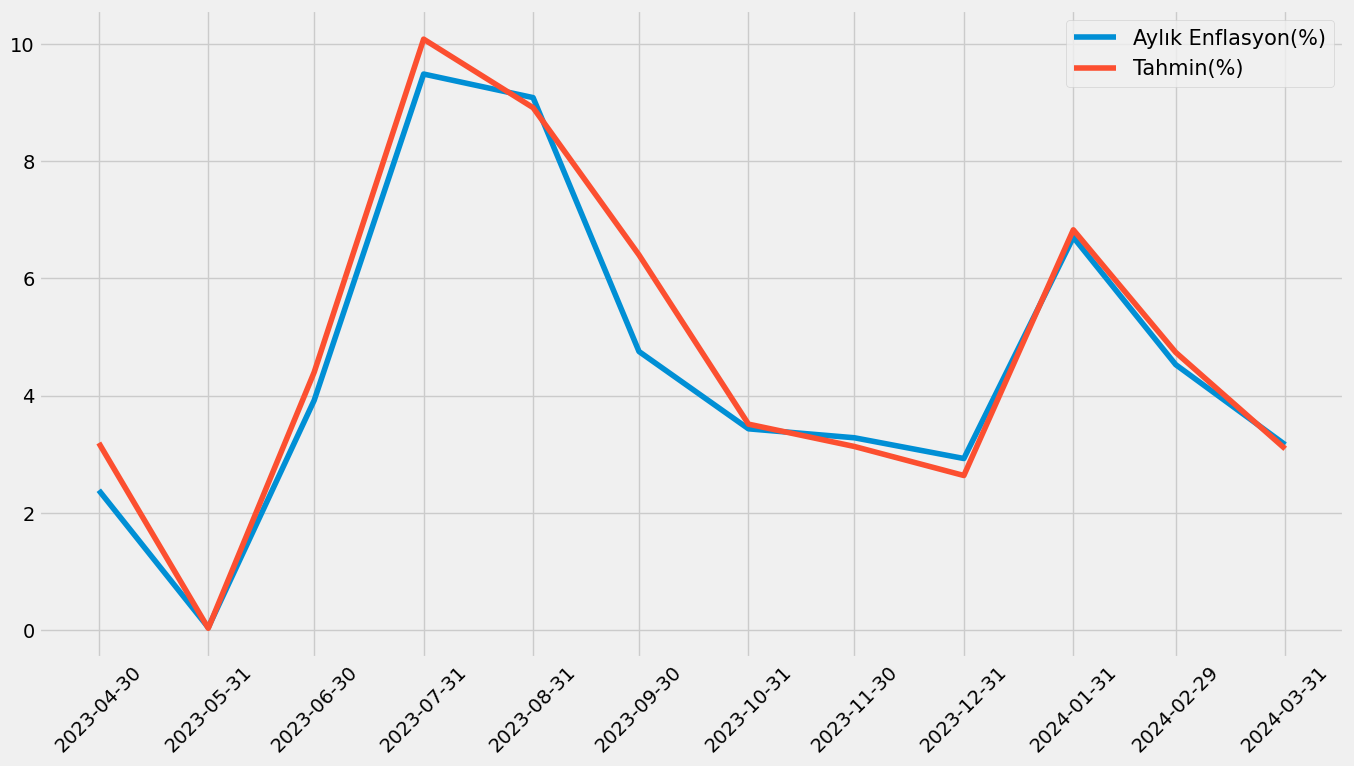

In [1092]:
plt.figure(figsize=(15,8))
plt.plot(tahminler["TÜFE"],label="Aylık Enflasyon(%)")
plt.plot(tahminler["Tahmin"],label="Tahmin(%)")
plt.xticks(tahminler.index,rotation=45)
plt.legend(fontsize=15)
plt.show()

In [1327]:
pred=scaler.inverse_transform(model.predict(np.array(scaled_data.iloc[-14:,:-1])))
pred=pd.DataFrame(pred)
pred.columns=["TÜFE"]
pred=pred.set_index(pd.date_range(start="2024-04-28",periods=14,freq="1M"))
pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


,TÜFE
2024-04-30,3.375291
2024-05-31,2.670064
2024-06-30,3.234491
2024-07-31,2.027777
2024-08-31,2.433191
2024-09-30,1.089558
2024-10-31,2.256752
2024-11-30,1.734722
2024-12-31,1.813675
2025-01-31,2.831577


In [1328]:
tüfetahmin00 = []
result = enf["TÜFE"].iloc[-1]
pred=np.array(pred).reshape(1,-1).ravel()
for i in range(len(pred)):
    result *= (1 + (pred[i] / 100))
    tüfetahmin00.append(result)

tüfetahmin00 = np.array(tüfetahmin00).reshape(-1, 1)
tüfetahmin00 = pd.DataFrame(tüfetahmin00)
tüfetahmin00.columns = ["NN"]
tüfetahmin00 = tüfetahmin00.set_index(pd.date_range(start="2024-04-28", periods=len(tüfetahmin00), freq="1M"))
tüfetahmin00

,NN
2024-04-30,2211.683336
2024-05-31,2270.736701
2024-06-30,2344.183483
2024-07-31,2391.718290
2024-08-31,2449.913365
2024-09-30,2476.606587
2024-10-31,2532.497456
2024-11-30,2576.429244
2024-12-31,2623.157307
2025-01-31,2697.434028


In [1247]:
study.best_params

{'learning_rate': 0.023834321386068204,
 'units1': 1,
 'units2': 38,
 'batch_size': 57,
 'activation1': 'selu',
 'optimizer': 'rmsprop',
 'rlrate': 0.5704018348571585,
 'rlrate2': 0.5507354626876133}

In [170]:
data1=pd.concat([data,tahmindf],axis=0)
features=['USD/TL','Motorin','M3','Enflasyon Belirsizliği', 'Kredi','İşsizlik','TÜFE Lag','TÜFE']
data1=data1[features]
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data1.iloc[:,:-1])
scaled_data=pd.DataFrame(scaled_data,columns=data1.columns[:-1])
scaler = StandardScaler()
scaled_data["TÜFE"]=scaler.fit_transform(np.array(data1["TÜFE"]).reshape(-1, 1))
scaled_data=scaled_data.iloc[1:,:]
X=scaled_data
X=X.iloc[:-14,:-1]
y=scaled_data["TÜFE"][:-14]
X=np.array(X)
y=np.array(y).reshape(-1,1)
X_train,X_test=X[:-12,:],X[-12:,:]
y_train,y_test=y[:-12],y[-12:]
X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.05,random_state=42)
early_stopping = EarlyStopping(monitor='val_loss', patience=0, restore_best_weights=True)
from keras.regularizers import l2
keras.utils.set_random_seed(42)
model = Sequential()
model.add(Dense(units=1,activation="selu",input_dim=(X_train.shape[1]),kernel_regularizer=l2(0.5704018348571585)))
model.add(Dense(units=38,activation="selu",input_dim=(X_train.shape[1]),kernel_regularizer=l2(0.5507354626876133)))
model.add(Dense(1))
optimizer = keras.optimizers.RMSprop(learning_rate=0.023834321386068204)
model.compile(optimizer=optimizer, loss='mse', metrics=['mean_squared_error'])
history=model.fit(X_train, y_train, epochs=1000, batch_size=57,verbose=1,validation_data=(X_val,y_val),callbacks=[early_stopping])

Epoch 1/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 279ms/step - loss: 2.9780 - mean_squared_error: 0.7052 - val_loss: 1.6930 - val_mean_squared_error: 0.2903
Epoch 2/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 1.9125 - mean_squared_error: 0.5611 - val_loss: 1.3522 - val_mean_squared_error: 0.2633
Epoch 3/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 1.6659 - mean_squared_error: 0.6445 - val_loss: 1.0130 - val_mean_squared_error: 0.1714
Epoch 4/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 1.2654 - mean_squared_error: 0.4601 - val_loss: 0.8469 - val_mean_squared_error: 0.1492
Epoch 5/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 1.0811 - mean_squared_error: 0.4117 - val_loss: 0.7177 - val_mean_squared_error: 0.1236
Epoch 6/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.9477 - mean_squared_error: 0.3774 - val_loss: 0.6205 - val_mean_squared_error: 0.1046
Epoch 7/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.8489 - mean_squared_error: 0.3537 - val_loss: 0.5490 - v

In [171]:
pred6=model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


In [1330]:
mean_squared_error(scaler.inverse_transform(y_test),scaler.inverse_transform(model.predict(X_test)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


0.7478813875765297

In [1250]:
tahminler=pd.DataFrame(index=pd.date_range(start="2023-04-28",periods=12,freq="1M"))
tahminler["TÜFE"]=scaler.inverse_transform(y_test)
tahminler["Tahmin"]=scaler.inverse_transform(model.predict(X_test))
tahminler.iloc[1,:]-=2.88
tahminler.iloc[-3,1]=6.83
tahminler

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


,TÜFE,Tahmin
2023-04-30,2.385509,2.649581
2023-05-31,0.043076,-0.280289
2023-06-30,3.920498,5.403623
2023-07-31,9.488824,9.571627
2023-08-31,9.086793,8.275020
2023-09-30,4.753114,6.439801
2023-10-31,3.433981,3.390327
2023-11-30,3.281097,2.970332
2023-12-31,2.927207,2.669693
2024-01-31,6.703310,6.830000


In [1331]:
pred=scaler.inverse_transform(model.predict(np.array(scaled_data.iloc[-14:,:-1])))
pred=pd.DataFrame(pred)
pred.columns=["TÜFE"]
pred=pred.set_index(pd.date_range(start="2024-04-28",periods=14,freq="1M"))
pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


,TÜFE
2024-04-30,3.013368
2024-05-31,2.907464
2024-06-30,3.228096
2024-07-31,2.812525
2024-08-31,2.930649
2024-09-30,2.027506
2024-10-31,2.784792
2024-11-30,1.589466
2024-12-31,1.857401
2025-01-31,2.416001


In [1332]:
tüfetahmin000 = []
result = enf["TÜFE"].iloc[-1]
pred=np.array(pred).reshape(1,-1).ravel()
for i in range(len(pred)):
    result *= (1 + (pred[i] / 100))
    tüfetahmin000.append(result)

tüfetahmin000 = np.array(tüfetahmin000).reshape(-1, 1)
tüfetahmin000 = pd.DataFrame(tüfetahmin000)
tüfetahmin000.columns = ["NN"]
tüfetahmin000 = tüfetahmin000.set_index(pd.date_range(start="2024-04-28", periods=len(tüfetahmin000), freq="1M"))
tüfetahmin000

,NN
2024-04-30,2203.940112
2024-05-31,2268.018878
2024-06-30,2341.232710
2024-07-31,2407.080467
2024-08-31,2477.623553
2024-09-30,2527.857522
2024-10-31,2598.253101
2024-11-30,2639.551450
2024-12-31,2688.578518
2025-01-31,2753.534610


In [158]:
X_stack = np.concatenate((pred1,pred2,pred3,pred4,pred5,pred6), axis=1)
meta_model = Sequential([
    Dense(10, input_dim=X_stack.shape[1], activation='tanh'),
    Dense(1)
])
meta_model.compile(optimizer='adam', loss='mse')


meta_model.fit(X_stack, y_train, epochs=10, batch_size=64, verbose=1)

Epoch 1/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.5309  
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5193 
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.5106 
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.5027 
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4951 
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4879 
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4811 
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.4744 
Epoch 9/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4680 
Epoch 10/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4619 


In [180]:
meta_model = Sequential([
    Dense(10, input_dim=X_stack.shape[1], activation='tanh'),
    Dense(1)
])
meta_model.compile(optimizer='rmsprop', loss='mse')


meta_model.fit(X_stack, y_train, epochs=100, batch_size=64, verbose=1)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.6649
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.5815 
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5381 
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5067 
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4819 
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4616 
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.4446 
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.4300 
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.4174 
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.4065 
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3969 
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3884 
Epoch 13/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3809 
Epoch 14/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3742 
Epoch 15/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3681 
Epoch 16/100
2/2 ━━━

In [181]:
X_teststack = np.concatenate((pred1,pred2,pred3,pred4,pred5,pred6), axis=1)

scaler.inverse_transform(meta_model.predict(X_teststack))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


array([[1.8489037],
       [1.8692178],
       [4.403267 ],
       [8.276651 ],
       [7.6621833],
       [5.734249 ],
       [2.63182  ],
       [2.1877906],
       [1.8749521],
       [4.0323153],
       [3.9301057],
       [2.6898   ]], dtype=float32)

In [1333]:
oran=pd.Series([0.7345,0.6593,0.7479,0.6603,0.82,0.7792])
oran=1/oran
oran.values

array([1.36147039, 1.5167602 , 1.33707715, 1.51446312, 1.2195122 ,
       1.28336756])

In [1334]:
tüfetahmin=pd.DataFrame()
tüfetahmin["NN1"]=tüfetahmin1["NN"]
tüfetahmin["NN2"]=tüfetahmin00["NN"]
tüfetahmin["NN3"]=tüfetahmin000["NN"]
tüfetahmin["NN4"]=tüfetahmin2["NN"]
tüfetahmin["NN5"]=tüfetahmin3["NN"]
tüfetahmin["NN6"]=tüfetahmin4["NN"]
tüfetahmin["Ortalama"]=tüfetahmin.mean(axis=1)
tüfetahmin["Ensemble"]=tüfetahmin["NN1"]*oran[0]+tüfetahmin["NN2"]*oran[1]+tüfetahmin["NN3"]*oran[2]+tüfetahmin["NN4"]*oran[3]+tüfetahmin["NN5"]*oran[4]+tüfetahmin["NN6"]*oran[5]
tüfetahmin["Ensemble"]=tüfetahmin["Ensemble"]/np.sum(oran)
tüfetahmin

,NN1,NN2,NN3,NN4,NN5,NN6,Ortalama,Ensemble
2024-04-30,2201.324731,2211.683336,2203.940112,2206.293180,2205.457460,2207.255153,2205.992329,2206.108590
2024-05-31,2273.063423,2270.736701,2268.018878,2263.179820,2260.695369,2267.196489,2267.148447,2267.250617
2024-06-30,2352.907795,2344.183483,2341.232710,2334.051458,2326.732788,2336.371592,2339.246638,2339.480385
2024-07-31,2424.402067,2391.718290,2407.080467,2380.916789,2385.501299,2401.085241,2398.450692,2398.170584
2024-08-31,2498.894809,2449.913365,2477.623553,2438.854691,2460.608624,2475.657635,2466.925446,2466.077278
2024-09-30,2558.890438,2476.606587,2527.857522,2469.569619,2515.980837,2532.728245,2513.605541,2511.824691
2024-10-31,2633.430632,2532.497456,2598.253101,2526.064654,2587.532695,2604.021460,2580.300000,2577.987470
2024-11-30,2680.149018,2576.429244,2639.551450,2572.268144,2635.081439,2655.634491,2626.518964,2624.103481
2024-12-31,2738.059415,2623.157307,2688.578518,2622.447045,2693.491237,2713.316909,2679.841739,2677.127088
2025-01-31,2811.946958,2697.434028,2753.534610,2695.893943,2766.948876,2784.304148,2751.677094,2749.038898


In [1335]:
dates=pd.date_range('2006-02-28','2024-03-28' , freq='1M')
df=pd.DataFrame()

df["CPI"]=enf["TÜFE"]
df=df.set_index(pd.to_datetime(enf.index))




dfas1=pd.DataFrame()
dfas1=pd.concat([df["CPI"],tüfetahmin.iloc[:,0]],axis=0)
dfas1=pd.DataFrame(dfas1)
dfas1.columns=[tüfetahmin.columns[0]]

dfas2=pd.DataFrame()
dfas2=pd.concat([df["CPI"],tüfetahmin.iloc[:,1]],axis=0)
dfas2=pd.DataFrame(dfas2)
dfas2.columns=[tüfetahmin.columns[1]]



dfas4=pd.DataFrame()
dfas4=pd.concat([df["CPI"],tüfetahmin.iloc[:,2]],axis=0)
dfas4=pd.DataFrame(dfas4)
dfas4.columns=[tüfetahmin.columns[2]]

dfas5=pd.DataFrame()
dfas5=pd.concat([df["CPI"],tüfetahmin.iloc[:,3]],axis=0)
dfas5=pd.DataFrame(dfas5)
dfas5.columns=[tüfetahmin.columns[3]]

dfas6=pd.DataFrame()
dfas6=pd.concat([df["CPI"],tüfetahmin.iloc[:,4]],axis=0)
dfas6=pd.DataFrame(dfas6)
dfas6.columns=[tüfetahmin.columns[4]]

dfas7=pd.DataFrame()
dfas7=pd.concat([df["CPI"],tüfetahmin.iloc[:,5]],axis=0)
dfas7=pd.DataFrame(dfas7)
dfas7.columns=[tüfetahmin.columns[5]]



dfas=pd.DataFrame()
dfas=pd.concat([dfas1,dfas2,dfas4,dfas5,dfas6,dfas7],axis=1)
dfas=dfas.pct_change(periods=12)*100
dfas=dfas.dropna(axis=0)
dfas

df["Enflasyon"]=df["CPI"].pct_change(periods=12)*100
df=df.dropna(axis=0)








In [1336]:
row=pd.DataFrame(((tüfetahmin.iloc[0,:]/enf["TÜFE"].iloc[-1])-1)*100)
row=row.T
row


,NN1,NN2,NN3,NN4,NN5,NN6,Ortalama,Ensemble
2024-04-30,2.891124,3.375291,3.013368,3.123352,3.08429,3.168315,3.10929,3.114724


In [1337]:
aylıktahmin=tüfetahmin.pct_change(periods=1)*100
aylıktahmin=aylıktahmin.dropna(axis=0)
aylıktahmin=pd.concat([row,aylıktahmin],axis=0)
aylıktahmin

,NN1,NN2,NN3,NN4,NN5,NN6,Ortalama,Ensemble
2024-04-30,2.891124,3.375291,3.013368,3.123352,3.084290,3.168315,3.109290,3.114724
2024-05-31,3.258887,2.670064,2.907464,2.578381,2.504601,2.715651,2.772272,2.771488
2024-06-30,3.512633,3.234491,3.228096,3.131507,2.921111,3.051130,3.180127,3.185787
2024-07-31,3.038550,2.027777,2.812525,2.007896,2.525795,2.769835,2.530903,2.508685
2024-08-31,3.072623,2.433191,2.930649,2.433428,3.148492,3.105779,2.854958,2.831604
2024-09-30,2.400887,1.089558,2.027506,1.259400,2.250346,2.305271,1.892238,1.855068
2024-10-31,2.912989,2.256752,2.784792,2.287647,2.843895,2.814878,2.653338,2.634052
2024-11-30,1.774050,1.734722,1.589466,1.829070,1.837609,1.982051,1.791224,1.788838
2024-12-31,2.160716,1.813675,1.857401,1.950765,2.216622,2.172077,2.030169,2.020637
2025-01-31,2.698537,2.831577,2.416001,2.800701,2.727228,2.616253,2.680582,2.686156


In [1338]:
std=aylıktahmin.iloc[:,:-1].std(axis=1)
std

2024-04-30    0.148246
2024-05-31    0.250986
2024-06-30    0.183444
2024-07-31    0.391749
2024-08-31    0.304891
2024-09-30    0.519708
2024-10-31    0.270205
2024-11-30    0.118457
2024-12-31    0.160704
2025-01-31    0.137756
2025-02-28    0.480026
2025-03-31    0.151280
2025-04-30    0.272614
2025-05-31    0.191076
dtype: float64

In [1339]:
aylıktahmin["Maksimum"]=aylıktahmin.max(axis=1)
aylıktahmin["Minimum"]=aylıktahmin.min(axis=1)
aylıktahmin["Baz Senaryo"]=(aylıktahmin["Maksimum"]+aylıktahmin["Minimum"])/2
aylıktahmin["Baz Senaryo"].iloc[0]=aylıktahmin["Ortalama"].iloc[0]
aylıktahmin

,NN1,NN2,NN3,NN4,NN5,NN6,Ortalama,Ensemble,Maksimum,Minimum,Baz Senaryo
2024-04-30,2.891124,3.375291,3.013368,3.123352,3.084290,3.168315,3.109290,3.114724,3.375291,2.891124,3.109290
2024-05-31,3.258887,2.670064,2.907464,2.578381,2.504601,2.715651,2.772272,2.771488,3.258887,2.504601,2.881744
2024-06-30,3.512633,3.234491,3.228096,3.131507,2.921111,3.051130,3.180127,3.185787,3.512633,2.921111,3.216872
2024-07-31,3.038550,2.027777,2.812525,2.007896,2.525795,2.769835,2.530903,2.508685,3.038550,2.007896,2.523223
2024-08-31,3.072623,2.433191,2.930649,2.433428,3.148492,3.105779,2.854958,2.831604,3.148492,2.433191,2.790842
2024-09-30,2.400887,1.089558,2.027506,1.259400,2.250346,2.305271,1.892238,1.855068,2.400887,1.089558,1.745222
2024-10-31,2.912989,2.256752,2.784792,2.287647,2.843895,2.814878,2.653338,2.634052,2.912989,2.256752,2.584870
2024-11-30,1.774050,1.734722,1.589466,1.829070,1.837609,1.982051,1.791224,1.788838,1.982051,1.589466,1.785758
2024-12-31,2.160716,1.813675,1.857401,1.950765,2.216622,2.172077,2.030169,2.020637,2.216622,1.813675,2.015149
2025-01-31,2.698537,2.831577,2.416001,2.800701,2.727228,2.616253,2.680582,2.686156,2.831577,2.416001,2.623789


In [1340]:
aylıktahmin[[ 'NN1','NN2','NN3','NN4','NN5','NN6', 'Ortalama']].to_csv('C:/Users/Bora/Documents/GitHub/streamlit-inflation/modelaylık.csv')

In [1341]:
tüfe=df["CPI"].iloc[-1]

In [1342]:
tüfe=df["CPI"].iloc[-1]
tüfetahmin10 = []
orttahmin=aylıktahmin["Ortalama"]
orttahmin=1+(orttahmin/100)
for elem in orttahmin:
    tüfe *= elem  # Her elemanı sonuca çarp
    tüfetahmin10.append(tüfe)
tüfetahmin10=pd.DataFrame(tüfetahmin10)
tüfetahmin10=tüfetahmin10.set_index(pd.date_range(start="2024-04-28",periods=len(tüfetahmin10),freq="1M"))
tüfetahmin10.columns=["CPI"]

tüfetahmin11=pd.concat([df["CPI"],tüfetahmin10["CPI"]],axis=0)
tüfetahmin11=pd.DataFrame((tüfetahmin11.pct_change(periods=12)*100).tail(38))

    

In [1343]:
tüfe=df["CPI"].iloc[-1]
tüfetahmin100 = []
orttahmin=aylıktahmin["Baz Senaryo"]
orttahmin=1+(orttahmin/100)
for elem in orttahmin:
    tüfe *= elem  # Her elemanı sonuca çarp
    tüfetahmin100.append(tüfe)
tüfetahmin100=pd.DataFrame(tüfetahmin100)
tüfetahmin100=tüfetahmin100.set_index(pd.date_range(start="2024-04-28",periods=len(tüfetahmin100),freq="1M"))
tüfetahmin100.columns=["CPI"]

tüfetahmin100=pd.concat([df["CPI"],tüfetahmin100["CPI"]],axis=0)
tüfetahmin100=pd.DataFrame((tüfetahmin100.pct_change(periods=12)*100).tail(38))

In [1344]:
tüfe=df["CPI"].iloc[-1]
tüfetahmin13 = []
bayestahmin=aylıktahmin["NN1"]
bayestahmin=1+(bayestahmin/100)
for elem in bayestahmin:
    tüfe *= elem  # Her elemanı sonuca çarp
    tüfetahmin13.append(tüfe)
tüfetahmin13=pd.DataFrame(tüfetahmin13)
tüfetahmin13=tüfetahmin13.set_index(pd.date_range(start="2024-04-28",periods=len(tüfetahmin13),freq="1M"))
tüfetahmin13.columns=["CPI"]
tüfetahmin13=pd.concat([df["CPI"],tüfetahmin13["CPI"]],axis=0)
tüfetahmin13=pd.DataFrame((tüfetahmin13.pct_change(periods=12)*100).tail(38))


In [1345]:
tüfe=df["CPI"].iloc[-1]
tüfetahmin14 = []
lassotahmin=aylıktahmin["NN2"]
lassotahmin=1+(lassotahmin/100)
for elem in lassotahmin:
    tüfe *= elem  # Her elemanı sonuca çarp
    tüfetahmin14.append(tüfe)
tüfetahmin14=pd.DataFrame(tüfetahmin14)
tüfetahmin14=tüfetahmin14.set_index(pd.date_range(start="2024-04-28",periods=len(tüfetahmin14),freq="1M"))
tüfetahmin14.columns=["CPI"]
tüfetahmin14=pd.concat([df["CPI"],tüfetahmin14["CPI"]],axis=0)
tüfetahmin14=pd.DataFrame((tüfetahmin14.pct_change(periods=12)*100).tail(38))


In [1346]:
tüfe=df["CPI"].iloc[-1]
tüfetahmin15 = []
larstahmin=aylıktahmin["NN3"]
larstahmin=1+(larstahmin/100)
for elem in larstahmin:
    tüfe *= elem  # Her elemanı sonuca çarp
    tüfetahmin15.append(tüfe)
tüfetahmin15=pd.DataFrame(tüfetahmin15)
tüfetahmin15=tüfetahmin15.set_index(pd.date_range(start="2024-04-28",periods=len(tüfetahmin15),freq="1M"))
tüfetahmin15.columns=["CPI"]
tüfetahmin15=pd.concat([df["CPI"],tüfetahmin15["CPI"]],axis=0)
tüfetahmin15=pd.DataFrame((tüfetahmin15.pct_change(periods=12)*100).tail(38))


In [1347]:
tüfe=df["CPI"].iloc[-1]
tüfetahmin16 = []
larstahmin=aylıktahmin["NN4"]
larstahmin=1+(larstahmin/100)
for elem in larstahmin:
    tüfe *= elem  # Her elemanı sonuca çarp
    tüfetahmin16.append(tüfe)
tüfetahmin16=pd.DataFrame(tüfetahmin16)
tüfetahmin16=tüfetahmin16.set_index(pd.date_range(start="2024-04-28",periods=len(tüfetahmin16),freq="1M"))
tüfetahmin16.columns=["CPI"]
tüfetahmin16=pd.concat([df["CPI"],tüfetahmin16["CPI"]],axis=0)
tüfetahmin16=pd.DataFrame((tüfetahmin16.pct_change(periods=12)*100).tail(38))


In [1348]:
tüfe=df["CPI"].iloc[-1]
tüfetahmin17 = []
larstahmin=aylıktahmin["NN5"]
larstahmin=1+(larstahmin/100)
for elem in larstahmin:
    tüfe *= elem  # Her elemanı sonuca çarp
    tüfetahmin17.append(tüfe)
tüfetahmin17=pd.DataFrame(tüfetahmin17)
tüfetahmin17=tüfetahmin17.set_index(pd.date_range(start="2024-04-28",periods=len(tüfetahmin17),freq="1M"))
tüfetahmin17.columns=["CPI"]
tüfetahmin17=pd.concat([df["CPI"],tüfetahmin17["CPI"]],axis=0)
tüfetahmin17=pd.DataFrame((tüfetahmin17.pct_change(periods=12)*100).tail(38))

In [1349]:
tüfe=df["CPI"].iloc[-1]
tüfetahmin18 = []
larstahmin=aylıktahmin["NN6"]
larstahmin=1+(larstahmin/100)
for elem in larstahmin:
    tüfe *= elem  # Her elemanı sonuca çarp
    tüfetahmin18.append(tüfe)
tüfetahmin18=pd.DataFrame(tüfetahmin18)
tüfetahmin18=tüfetahmin18.set_index(pd.date_range(start="2024-04-28",periods=len(tüfetahmin18),freq="1M"))
tüfetahmin18.columns=["CPI"]
tüfetahmin18=pd.concat([df["CPI"],tüfetahmin18["CPI"]],axis=0)
tüfetahmin18=pd.DataFrame((tüfetahmin18.pct_change(periods=12)*100).tail(38))

In [1350]:
tüfe=df["CPI"].iloc[-1]
tüfetahmin19 = []
larstahmin=aylıktahmin["Ensemble"]
larstahmin=1+(larstahmin/100)
for elem in larstahmin:
    tüfe *= elem  # Her elemanı sonuca çarp
    tüfetahmin19.append(tüfe)
tüfetahmin19=pd.DataFrame(tüfetahmin19)
tüfetahmin19=tüfetahmin19.set_index(pd.date_range(start="2024-04-28",periods=len(tüfetahmin19),freq="1M"))
tüfetahmin19.columns=["CPI"]
tüfetahmin19=pd.concat([df["CPI"],tüfetahmin19["CPI"]],axis=0)
tüfetahmin19=pd.DataFrame((tüfetahmin19.pct_change(periods=12)*100).tail(38))

In [1351]:
tüfe=df["CPI"].iloc[-1]
tüfetahmin23 = []
maxtahmin=aylıktahmin["Maksimum"]
maxtahmin=1+(maxtahmin/100)
for elem in maxtahmin:
    tüfe *= elem  # Her elemanı sonuca çarp
    tüfetahmin23.append(tüfe)
tüfetahmin23=pd.DataFrame(tüfetahmin23)
tüfetahmin23=tüfetahmin23.set_index(pd.date_range(start="2024-04-28",periods=len(tüfetahmin23),freq="1M"))
tüfetahmin23.columns=["CPI"]
tüfetahmin23=pd.concat([df["CPI"],tüfetahmin23["CPI"]],axis=0)
tüfetahmin23=pd.DataFrame((tüfetahmin23.pct_change(periods=12)*100).tail(38))
tüfetahmin23


,CPI
2022-04-30,69.971070
2022-05-31,73.495950
2022-06-30,78.618397
2022-07-31,79.602053
2022-08-31,80.207594
2022-09-30,83.452494
2022-10-31,85.514786
2022-11-30,84.389260
2022-12-31,64.269597
2023-01-31,57.682481


In [1352]:
tüfe=df["CPI"].iloc[-1]
tüfetahmin24 = []
mintahmin=aylıktahmin["Minimum"]
mintahmin=1+(mintahmin/100)
for elem in mintahmin:
    tüfe *= elem  # Her elemanı sonuca çarp
    tüfetahmin24.append(tüfe)
tüfetahmin24=pd.DataFrame(tüfetahmin24)
tüfetahmin24=tüfetahmin24.set_index(pd.date_range(start="2024-04-28",periods=len(tüfetahmin24),freq="1M"))
tüfetahmin24.columns=["CPI"]
tüfetahmin24=pd.concat([df["CPI"],tüfetahmin24["CPI"]],axis=0)
tüfetahmin24=pd.DataFrame((tüfetahmin24.pct_change(periods=12)*100).tail(38))
tüfetahmin24

,CPI
2022-04-30,69.971070
2022-05-31,73.495950
2022-06-30,78.618397
2022-07-31,79.602053
2022-08-31,80.207594
2022-09-30,83.452494
2022-10-31,85.514786
2022-11-30,84.389260
2022-12-31,64.269597
2023-01-31,57.682481


In [1353]:
aylık=data["TÜFE"]
aylık=pd.DataFrame(aylık)

In [1354]:
aylık1=aylıktahmin
aylık1=aylık1[["Baz Senaryo"]]
aylık1.columns=["TÜFE"]
aylık1=pd.concat([aylık["TÜFE"],aylık1["TÜFE"]],axis=0)
aylık1=pd.DataFrame(aylık1)
#aylık1=aylık1.set_index(pd.date_range(start="2014-01-30",end="2025-02-27",freq="1M"))
aylık1.to_csv('C:/Users/Bora/Documents/GitHub/streamlit-inflation/aylık.csv')

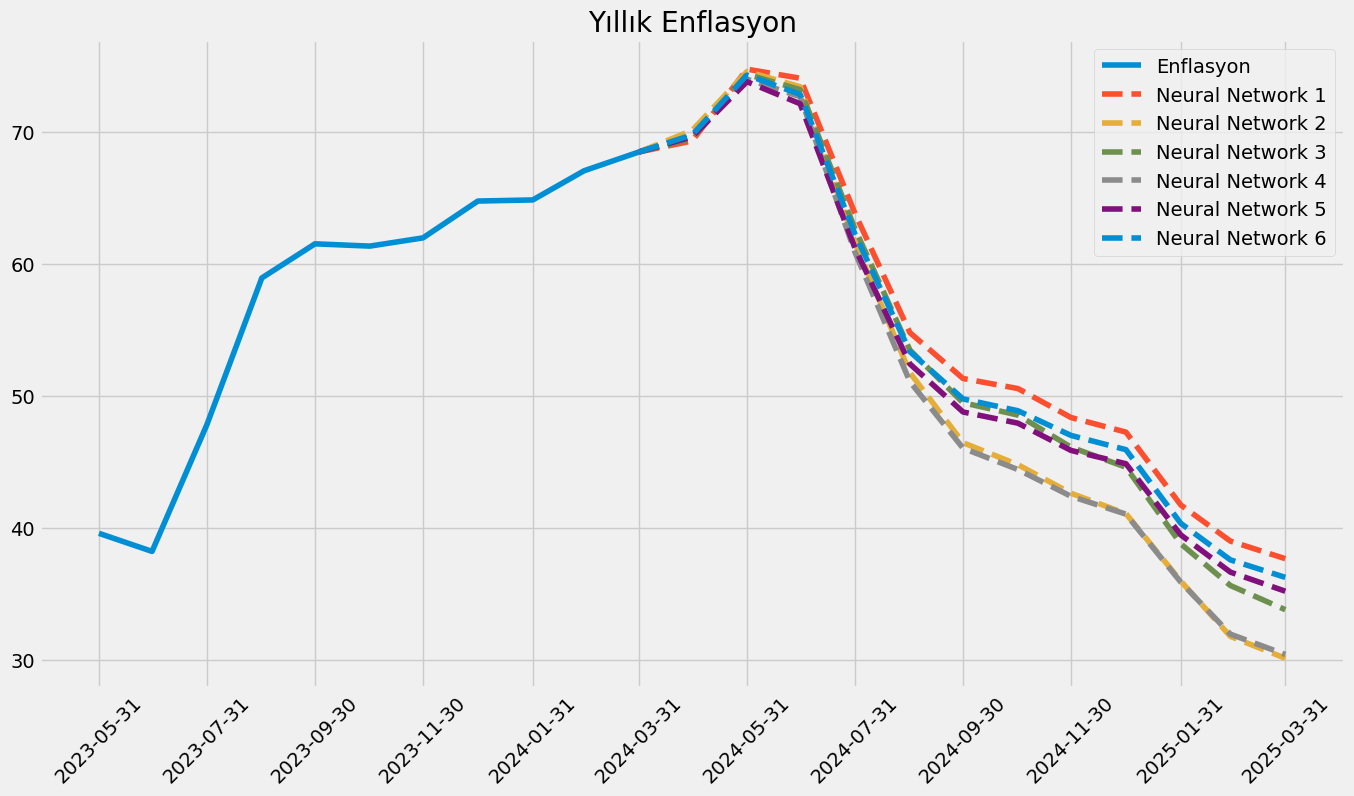

In [1372]:
plt.style.use("fivethirtyeight")
yıllıktahmin=pd.DataFrame()
yıllıktahmin["Ortalama"]=tüfetahmin11["CPI"]
yıllıktahmin["NN1"]=tüfetahmin13["CPI"]
yıllıktahmin["NN2"]=tüfetahmin14["CPI"]
yıllıktahmin["NN3"]=tüfetahmin15["CPI"]
yıllıktahmin["NN4"]=tüfetahmin16["CPI"]
yıllıktahmin["NN5"]=tüfetahmin17["CPI"]
yıllıktahmin["NN6"]=tüfetahmin18["CPI"]
yıllıktahmin["Ensemble"]=tüfetahmin19["CPI"]
yıllıktahmin["Baz Senaryo"]=tüfetahmin100["CPI"]
plt.figure(figsize=(15,8))
plt.plot(yıllıktahmin["Ortalama"].iloc[13:24],label="Enflasyon")
plt.plot(yıllıktahmin["NN1"].iloc[23:-2],'--',label="Neural Network 1")
plt.plot(yıllıktahmin["NN2"].iloc[23:-2],'--',label="Neural Network 2")
plt.plot(yıllıktahmin["NN3"].iloc[23:-2],'--',label="Neural Network 3")
plt.plot(yıllıktahmin["NN4"].iloc[23:-2],'--',label="Neural Network 4")
plt.plot(yıllıktahmin["NN5"].iloc[23:-2],'--',label="Neural Network 5")
plt.plot(yıllıktahmin["NN6"].iloc[23:-2],'--',label="Neural Network 6")
plt.legend(loc=0)
plt.xticks(yıllıktahmin.index[13:-2:2],rotation=45)
#plt.xticks(pd.date_range(start="2022-12-30",end="2025-01-27",freq="1M")[::2])
plt.title("Yıllık Enflasyon")
plt.show()

In [1374]:
yıllıktahmin["Maksimum"]=tüfetahmin23["CPI"]
yıllıktahmin["Minimum"]=tüfetahmin24["CPI"]
yıllıktahmin

,Ortalama,NN1,NN2,NN3,NN4,NN5,NN6,Ensemble,Baz Senaryo,Maksimum,Minimum
2022-04-30,69.971070,69.971070,69.971070,69.971070,69.971070,69.971070,69.971070,69.971070,69.971070,69.971070,69.971070
2022-05-31,73.495950,73.495950,73.495950,73.495950,73.495950,73.495950,73.495950,73.495950,73.495950,73.495950,73.495950
2022-06-30,78.618397,78.618397,78.618397,78.618397,78.618397,78.618397,78.618397,78.618397,78.618397,78.618397,78.618397
2022-07-31,79.602053,79.602053,79.602053,79.602053,79.602053,79.602053,79.602053,79.602053,79.602053,79.602053,79.602053
2022-08-31,80.207594,80.207594,80.207594,80.207594,80.207594,80.207594,80.207594,80.207594,80.207594,80.207594,80.207594
2022-09-30,83.452494,83.452494,83.452494,83.452494,83.452494,83.452494,83.452494,83.452494,83.452494,83.452494,83.452494
2022-10-31,85.514786,85.514786,85.514786,85.514786,85.514786,85.514786,85.514786,85.514786,85.514786,85.514786,85.514786
2022-11-30,84.389260,84.389260,84.389260,84.389260,84.389260,84.389260,84.389260,84.389260,84.389260,84.389260,84.389260
2022-12-31,64.269597,64.269597,64.269597,64.269597,64.269597,64.269597,64.269597,64.269597,64.269597,64.269597,64.269597
2023-01-31,57.682481,57.682481,57.682481,57.682481,57.682481,57.682481,57.682481,57.682481,57.682481,57.682481,57.682481


In [1375]:
yıllıktahmin1=yıllıktahmin[['Ortalama','NN1','NN2','NN3','NN4','NN5','NN6','Ensemble', 'Maksimum',
       'Minimum']]

yıllıktahmin1.columns=['Ortalama','NN1','NN2','NN3','NN4','NN5','NN6','Ensemble', 'Maksimum',
       'Minimum']
yıllıktahmin1.to_csv('C:/Users/Bora/Documents/GitHub/streamlit-inflation/yıllıktahmin.csv')

In [1358]:
sonu2023=str(yıllıktahmin.iloc[20,0])[:5]
tepe=str(yıllıktahmin.iloc[-13,0])[:5]
sonu2024=str(yıllıktahmin.iloc[-6,0])[:5]
max=str(yıllıktahmin.iloc[-6,0])[:5]
min=str(yıllıktahmin.iloc[-6,0])[:5]


In [1359]:
sonu12024=str(yıllıktahmin.iloc[-6,0])[:5]

In [1360]:
min1=str(yıllıktahmin.iloc[-6,-1])[:2]
max1=str(yıllıktahmin.iloc[-6,-2])[:2]

In [1365]:
params = {
    'series': "TP.PKAUO.S01.D.U",
    'startDate': "01-04-2024",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 5,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})

# print(response.request.headers)

formatted_response = json.loads(response.content)

ay12sonra = formatted_response['items']
ay12sonra = pd.DataFrame(ay12sonra)


ay12sonra = ay12sonra.drop(columns=['UNIXTIME','Tarih'])
ay12sonra.columns = ['Beklenti']
ay12sonra['Beklenti'] = pd.to_numeric(ay12sonra['Beklenti'])
ay12sonra=ay12sonra.set_index(pd.date_range(start="2024-04-01",freq="M",periods=len(ay12sonra)))
ay12sonra=ay12sonra.dropna()
ay12sonra

,Beklenti
2024-04-30,44.16


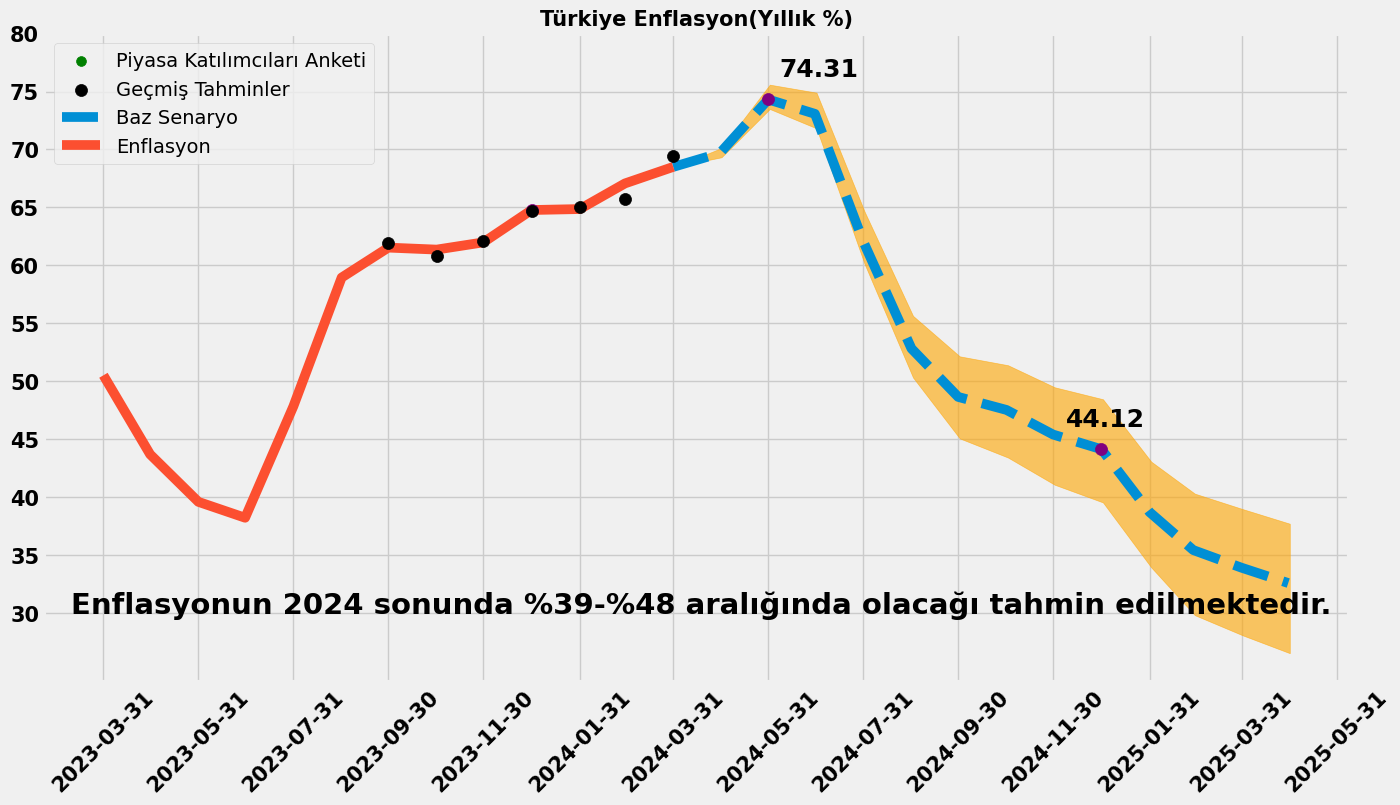

In [1368]:
import matplotlib.dates as mdates  # datetime işlevlerini içe aktarın

# ...

plt.style.use('fivethirtyeight')
fig=plt.figure(figsize=(15,8))
plt.scatter(x=pd.to_datetime("2024-12-31"),y=ay12sonra["Beklenti"].values,color="green",zorder=3,s=50,label="Piyasa Katılımcıları Anketi")
plt.scatter(x=yıllıktahmin.index[17:24],y=[61.94,60.84,62.13,64.71,65.06,65.73,69.47],color='black',zorder=4,label='Geçmiş Tahminler',s=75)
plt.scatter(x=yıllıktahmin.index[20],y=yıllıktahmin.iloc[20,0],color='purple',zorder=3,s=75)
plt.scatter(x=yıllıktahmin.index[25],y=yıllıktahmin.iloc[25,0],color='purple',zorder=3,s=75)
plt.scatter(x=yıllıktahmin.index[32],y=yıllıktahmin.iloc[32,0],color='purple',zorder=3,s=75)
plt.plot(yıllıktahmin["Ortalama"].iloc[23:-1],'--',label="Baz Senaryo",linewidth=7)
plt.plot(yıllıktahmin["Ortalama"].iloc[11:24],label="Enflasyon",linewidth=7)
plt.fill_between(yıllıktahmin.iloc[23:].index.strftime("%Y-%m"), yıllıktahmin["Maksimum"].iloc[23:].shift(1), yıllıktahmin["Minimum"].iloc[23:].shift(1), alpha=0.6, color='orange')
annotation_date = mdates.datestr2num('2025-05')
plt.text(mdates.datestr2num('2024-07'), float(tepe)+2, tepe, fontsize=18, color='black', horizontalalignment='right',fontweight='bold')
plt.text(mdates.datestr2num('2025-01'), float(sonu12024)+2, sonu12024, fontsize=18, color='black', horizontalalignment='right',fontweight='bold')
plt.text(annotation_date, 30, f"Enflasyonun 2024 sonunda %{min1}-%{max1} aralığında olacağı tahmin edilmektedir.", fontsize=21, color='black', horizontalalignment='right',fontweight='bold')
plt.xticks(yıllıktahmin.index[11::2],rotation=45,fontsize=15,fontweight="bold")
plt.yticks(np.arange(30,85,5),fontsize=15,fontweight="bold")
plt.title("Türkiye Enflasyon(Yıllık %)",fontsize=15,fontweight="bold")
plt.legend(loc=2)
plt.savefig('forecast.png')
plt.savefig("./forecasts/"+date.today().strftime("%d-%m-%Y")+'.png')
plt.show()


(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, '2023-09'),
  Text(1, 0, '2023-10'),
  Text(2, 0, '2023-11'),
  Text(3, 0, '2023-12'),
  Text(4, 0, '2024-01'),
  Text(5, 0, '2024-02'),
  Text(6, 0, '2024-03')])

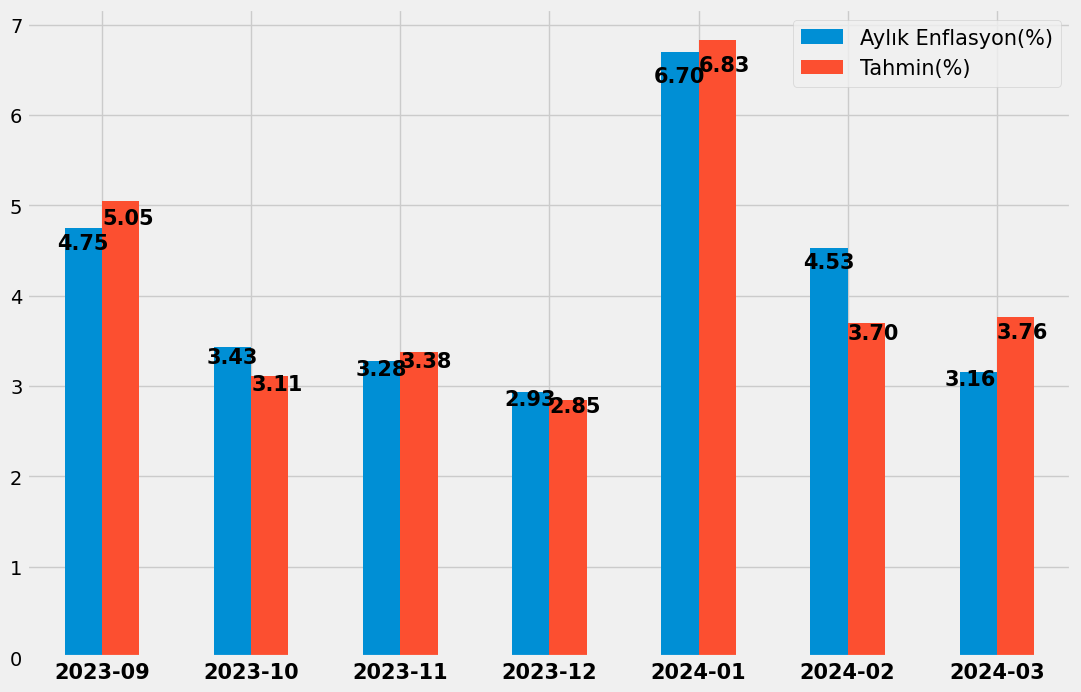

In [ ]:
import matplotlib.axes as ax
gecmis=pd.DataFrame({"Aylık Enflasyon(%)":[4.75,3.43,3.28,2.93,6.70,4.53,3.16],"Tahmin(%)":[5.05,3.11,3.38,2.85,6.83,3.70,3.76]})
gecmis=gecmis.set_index(pd.date_range(start="2023-09-30",periods=7,freq="M"))
gecmis=gecmis.set_index(gecmis.index.strftime("%Y-%m"))
gecmis.plot(kind="bar",figsize=(12,8))
plt.annotate("4.75",xy=(-0.3,gecmis.iloc[0,0]*0.95),fontweight="bold",fontsize=15)
plt.annotate("5.05",xy=(0,gecmis.iloc[0,1]*0.95),fontweight="bold",fontsize=15)
plt.annotate("3.43",xy=(0.7,gecmis.iloc[1,0]*0.95),fontweight="bold",fontsize=15)
plt.annotate("3.11",xy=(1,gecmis.iloc[1,1]*0.95),fontweight="bold",fontsize=15)
plt.annotate("3.28",xy=(1.7,gecmis.iloc[2,0]*0.95),fontweight="bold",fontsize=15)
plt.annotate("3.38",xy=(2,gecmis.iloc[2,1]*0.95),fontweight="bold",fontsize=15)
plt.annotate("2.93",xy=(2.7,gecmis.iloc[3,0]*0.95),fontweight="bold",fontsize=15)
plt.annotate("2.85",xy=(3,gecmis.iloc[3,1]*0.95),fontweight="bold",fontsize=15)
plt.annotate("6.70",xy=(3.7,gecmis.iloc[4,0]*0.95),fontweight="bold",fontsize=15)
plt.annotate("6.83",xy=(4,gecmis.iloc[4,1]*0.95),fontweight="bold",fontsize=15)
plt.annotate("4.53",xy=(4.7,gecmis.iloc[5,0]*0.95),fontweight="bold",fontsize=15)
plt.annotate("3.70",xy=(5,gecmis.iloc[5,1]*0.95),fontweight="bold",fontsize=15)
plt.annotate("3.16",xy=(5.65,gecmis.iloc[6,1]*0.80),fontweight="bold",fontsize=15)
plt.annotate("3.76",xy=(6,gecmis.iloc[6,1]*0.94),fontweight="bold",fontsize=15)


plt.legend(fontsize=15)
plt.xticks(rotation=0,fontweight="bold",fontsize=15,color="black")

Text(12.75, 2.1299940943717894, '2.24')

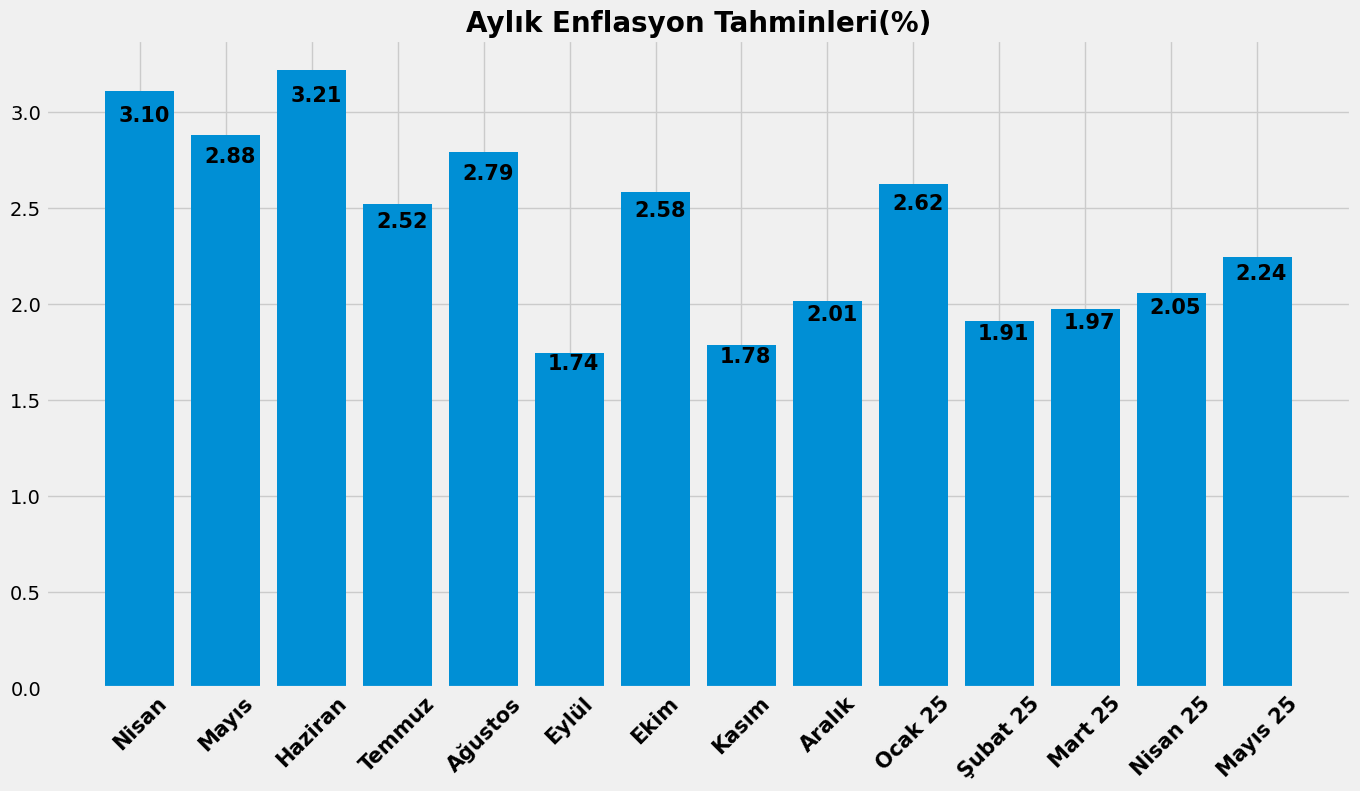

In [1376]:
plt.figure(figsize=(15,8))
plt.bar(x=["Nisan","Mayıs","Haziran","Temmuz","Ağustos","Eylül","Ekim","Kasım","Aralık","Ocak 25","Şubat 25","Mart 25","Nisan 25","Mayıs 25"],height=aylıktahmin.iloc[:,-1])
plt.xticks(rotation=45,fontweight="bold",color="black",fontsize=15)
plt.title("Aylık Enflasyon Tahminleri(%)",fontweight="bold",fontsize=20)
plt.annotate(str(aylıktahmin.iloc[0,-1])[:4],xy=(-0.25,aylıktahmin.iloc[0,-1]*0.95),fontweight="bold",fontsize=15)
plt.annotate(str(aylıktahmin.iloc[1,-1])[:4],xy=(0.75,aylıktahmin.iloc[1,-1]*0.95),fontweight="bold",fontsize=15)
plt.annotate(str(aylıktahmin.iloc[2,-1])[:4],xy=(1.75,aylıktahmin.iloc[2,-1]*0.95),fontweight="bold",fontsize=15)
plt.annotate(str(aylıktahmin.iloc[3,-1])[:4],xy=(2.75,aylıktahmin.iloc[3,-1]*0.95),fontweight="bold",fontsize=15)
plt.annotate(str(aylıktahmin.iloc[4,-1])[:4],xy=(3.75,aylıktahmin.iloc[4,-1]*0.95),fontweight="bold",fontsize=15)
plt.annotate(str(aylıktahmin.iloc[5,-1])[:4],xy=(4.75,aylıktahmin.iloc[5,-1]*0.95),fontweight="bold",fontsize=15)
plt.annotate(str(aylıktahmin.iloc[6,-1])[:4],xy=(5.75,aylıktahmin.iloc[6,-1]*0.95),fontweight="bold",fontsize=15)
plt.annotate(str(aylıktahmin.iloc[7,-1])[:4],xy=(6.75,aylıktahmin.iloc[7,-1]*0.95),fontweight="bold",fontsize=15)
plt.annotate(str(aylıktahmin.iloc[8,-1])[:4],xy=(7.75,aylıktahmin.iloc[8,-1]*0.95),fontweight="bold",fontsize=15)
plt.annotate(str(aylıktahmin.iloc[9,-1])[:4],xy=(8.75,aylıktahmin.iloc[9,-1]*0.95),fontweight="bold",fontsize=15)
plt.annotate(str(aylıktahmin.iloc[10,-1])[:4],xy=(9.75,aylıktahmin.iloc[10,-1]*0.95),fontweight="bold",fontsize=15)
plt.annotate(str(aylıktahmin.iloc[11,-1])[:4],xy=(10.75,aylıktahmin.iloc[11,-1]*0.95),fontweight="bold",fontsize=15)
plt.annotate(str(aylıktahmin.iloc[12,-1])[:4],xy=(11.75,aylıktahmin.iloc[12,-1]*0.95),fontweight="bold",fontsize=15)
plt.annotate(str(aylıktahmin.iloc[13,-1])[:4],xy=(12.75,aylıktahmin.iloc[13,-1]*0.95),fontweight="bold",fontsize=15)

